# Analyzing NYTbd Sample 2
<br>
This notebook is looking at the NYTbd Sample 2 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))

## Import Data

In [4]:
petrarch2 = pd.read_csv("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/combined_output_2-24_11-13-11.txt", sep='\t')
accent2 = pd.read_csv("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/ACCENT output NYTbd 14 18 sample 2.csv")
petrarch2.drop('Unnamed: 0', axis=1, inplace=True)

## Let's Start with Root Code 18
<br>
Subset PETRARCH and ACCENT on root code 18

In [5]:
petrarch2_root18 = petrarch2[petrarch2.root_code == 18]
accent2_root18 = accent2[accent2.root_code == 18]

In [6]:
# parse petrarch root code 18
%time petrarch2_root18['parsed'] = core_parser(petrarch2_root18, 'text')
petrarch2_root18['dep'] = dep_parser(petrarch2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 166 ms, sys: 22.8 ms, total: 189 ms
Wall time: 20.1 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# parse accent root code 18
%time accent2_root18['parsed'] = core_parser(accent2_root18, 'text')
accent2_root18['dep'] = dep_parser(accent2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 390 ms, sys: 320 ms, total: 710 ms
Wall time: 2min 59s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Articles where PETRARCH and ACCENT ***did not*** find the same event and ***did*** find the same event

In [8]:
# Index on 'aid' and 'code' 
keys = list(['aid', 'code'])
accent2_root18_index = accent2_root18.set_index(keys).index
petrarch2_root18_index = petrarch2_root18.set_index(keys).index

# Produce df's of mutually exclusive events 
accent2_root18_only = accent2_root18[~accent2_root18_index.isin(petrarch2_root18_index)]
petrarch2_root18_only = petrarch2_root18[~petrarch2_root18_index.isin(accent2_root18_index)]

# Produce df's of same article, same coding
accent2_root18_same_code = accent2_root18[accent2_root18_index.isin(petrarch2_root18_index)]
petrarch2_root18_same_code = petrarch2_root18[petrarch2_root18_index.isin(accent2_root18_index)]

# sort values on AID and reset index 
accent2_root18_only = accent2_root18_only.sort_values('aid').reset_index(drop = True)
petrarch2_root18_only = petrarch2_root18_only.sort_values('aid').reset_index(drop = True)

accent2_root18_same_code = accent2_root18_same_code.sort_values('aid').reset_index(drop = True)
petrarch2_root18_same_code = petrarch2_root18_same_code.sort_values('aid').reset_index(drop = True)

### Articles where PETRARCH and ACCENT found ***different*** events

In [9]:
## Index only on AID
new_key = list(['aid'])
accent2_root18_index1 = accent2_root18.set_index(new_key).index
petrarch2_root18_index1 = petrarch2_root18.set_index(new_key).index

## df of same articles coded by each event code
accent2_root18_sameAID = accent2_root18[accent2_root18_index1.isin(petrarch2_root18_index1)]
petrarch2_root18_sameAID = petrarch2_root18[petrarch2_root18_index1.isin(accent2_root18_index1)]

## sort on AID and reset index
accent2_root18_sameAID = accent2_root18_sameAID.sort_values('aid').reset_index(drop = True)
petrarch2_root18_sameAID = petrarch2_root18_sameAID.sort_values('aid').reset_index(drop = True)

## index dfs of same articles on AID and event code
accent2_root18_sameAID_index = accent2_root18_sameAID.set_index(keys).index
petrarch2_root18_sameAID_index = petrarch2_root18_sameAID.set_index(keys).index

## create df's of different codings in same event
accent2_root18_diffCODE = accent2_root18_sameAID[~accent2_root18_sameAID_index.isin(petrarch2_root18_sameAID_index)]
petrarch2_root18_diffCODE = petrarch2_root18_sameAID[~petrarch2_root18_sameAID_index.isin(accent2_root18_sameAID_index)]

In [10]:
# discard pile of events with same AID and SAME code
accent2_root18_discard = accent2_root18_sameAID[accent2_root18_sameAID_index.isin(petrarch2_root18_sameAID_index)]
petrarch2_root18_discard = petrarch2_root18_sameAID[petrarch2_root18_sameAID_index.isin(accent2_root18_sameAID_index)]

In [11]:
# sort value AID low to high and reset index
petrarch2_root18_diffCODE = petrarch2_root18_diffCODE.sort_values('aid').reset_index(drop = True)
accent2_root18_diffCODE = accent2_root18_diffCODE.sort_values('aid').reset_index(drop = True)

### Articles where only ACCENT found an event

In [108]:
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

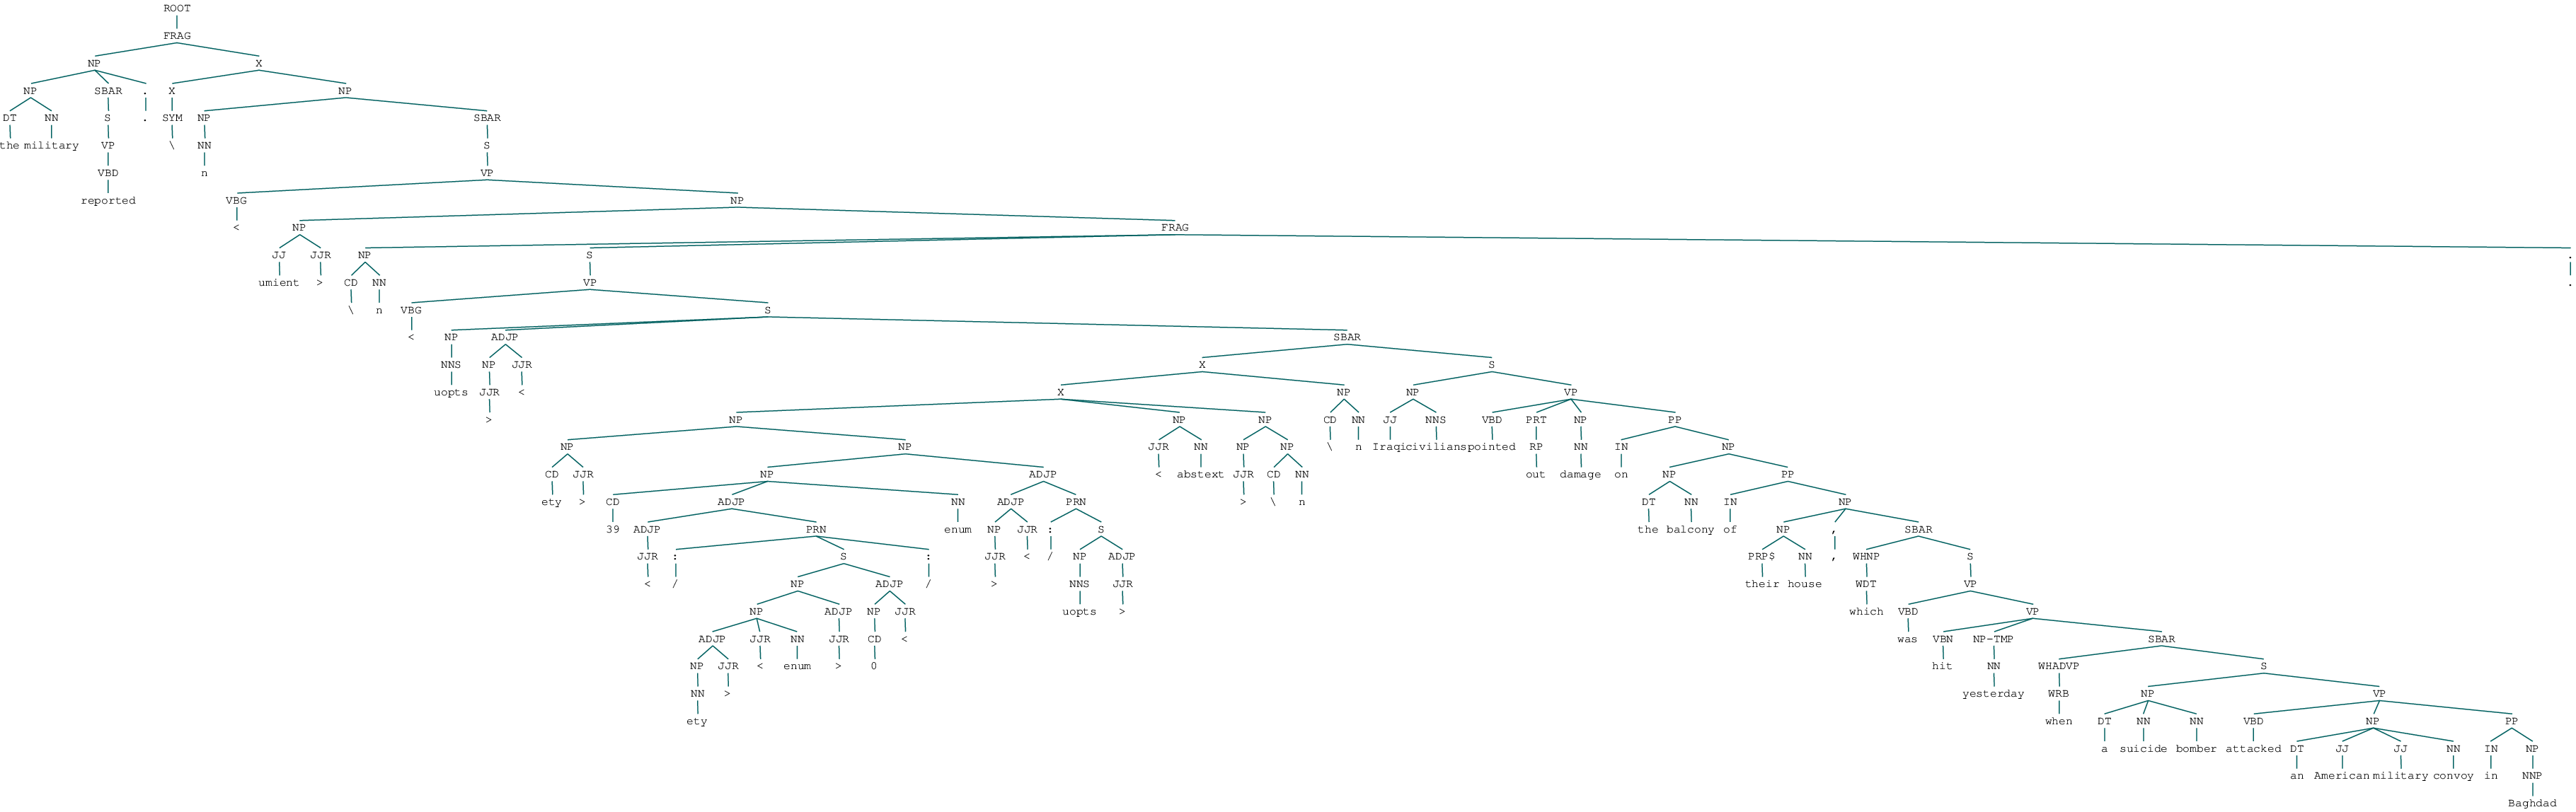

'Text =  the military reported.\\n&lt;umient&gt;\\n&lt;uopts&gt;&lt;ety&gt;39&lt;/ety&gt;&lt;enum&gt;0&lt;/enum&gt;&lt;/uopts&gt;&lt;abstext&gt;\\n\\n Iraqi civilians pointed out damage on the balcony of their house, which was hit yesterday when a suicide bomber attacked an American military convoy in Baghdad.'

'Code = 1831'

In [112]:
parsed_output(accent2_root18_only, 78)

### Find examples where sentence structure my have impacted coding

In [119]:
petrarch2_1831_same_code = petrarch2_root18_same_code[petrarch2_root18_same_code['code'] == 1831]
petrarch2_1831_same_code = petrarch2_1831_same_code.reset_index(drop = True)

In [120]:
accent2_1831_only = accent2_root18_only[accent2_root18_only['code'] == 1831]
accent2_1831_only = accent2_1831_only.reset_index(drop = True)

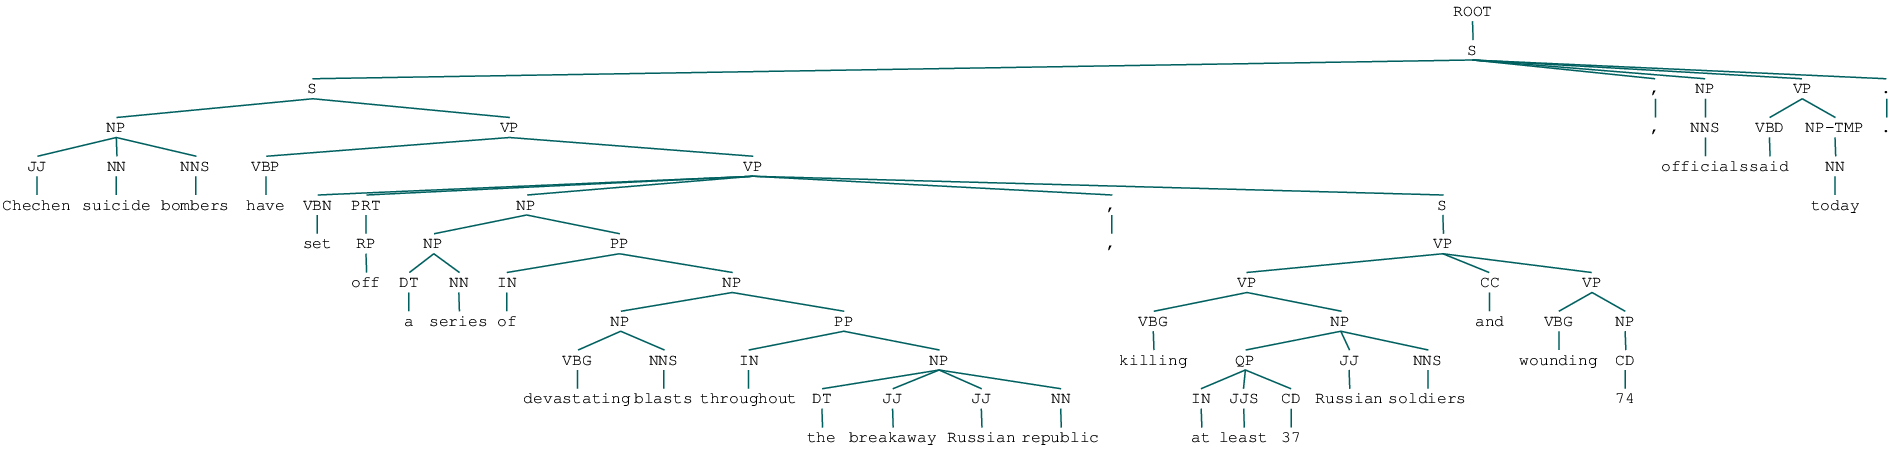

'Text = Chechen suicide bombers have set off a series of devastating blasts throughout the breakaway Russian republic , killing at least 37 Russian soldiers and wounding 74 , officials said today .'

'Code = 1831'

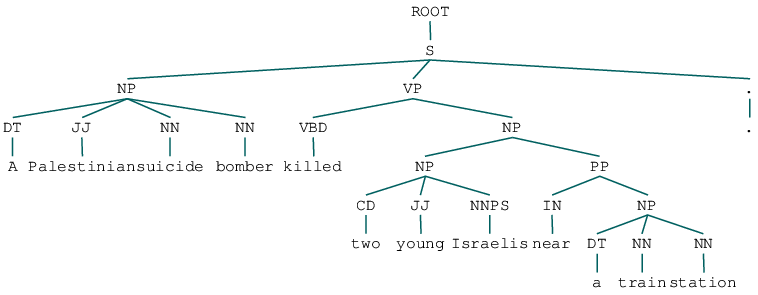

'Text = A Palestinian suicide bomber killed two young Israelis near a train station .'

'Code = 1831'

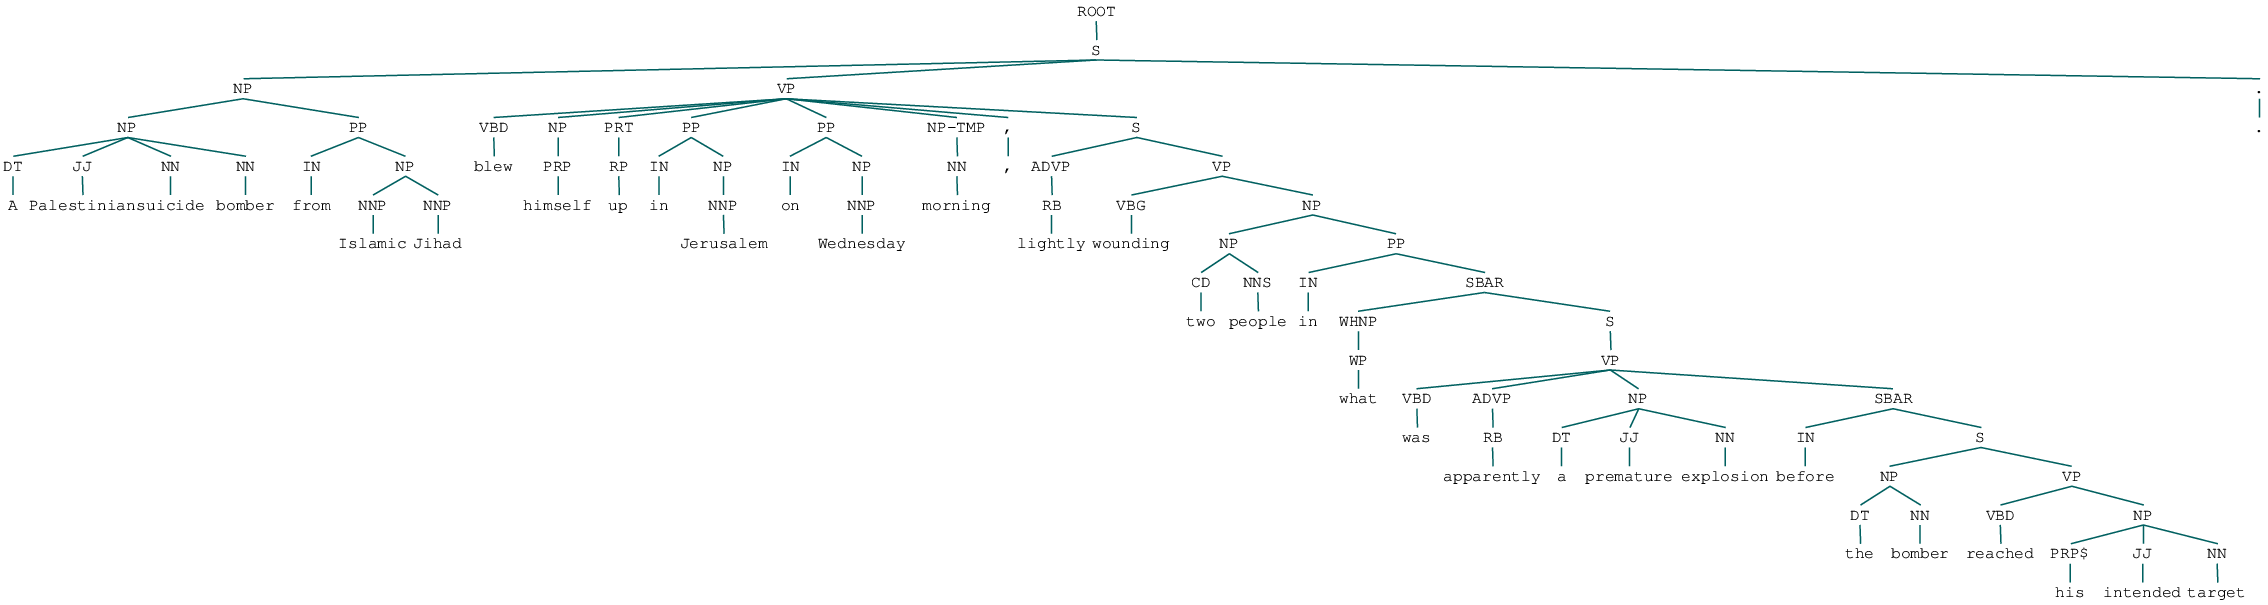

'Text = A Palestinian suicide bomber from Islamic Jihad blew himself up in Jerusalem on Wednesday morning , lightly wounding two people in what was apparently a premature explosion before the bomber reached his intended target .'

'Code = 1831'

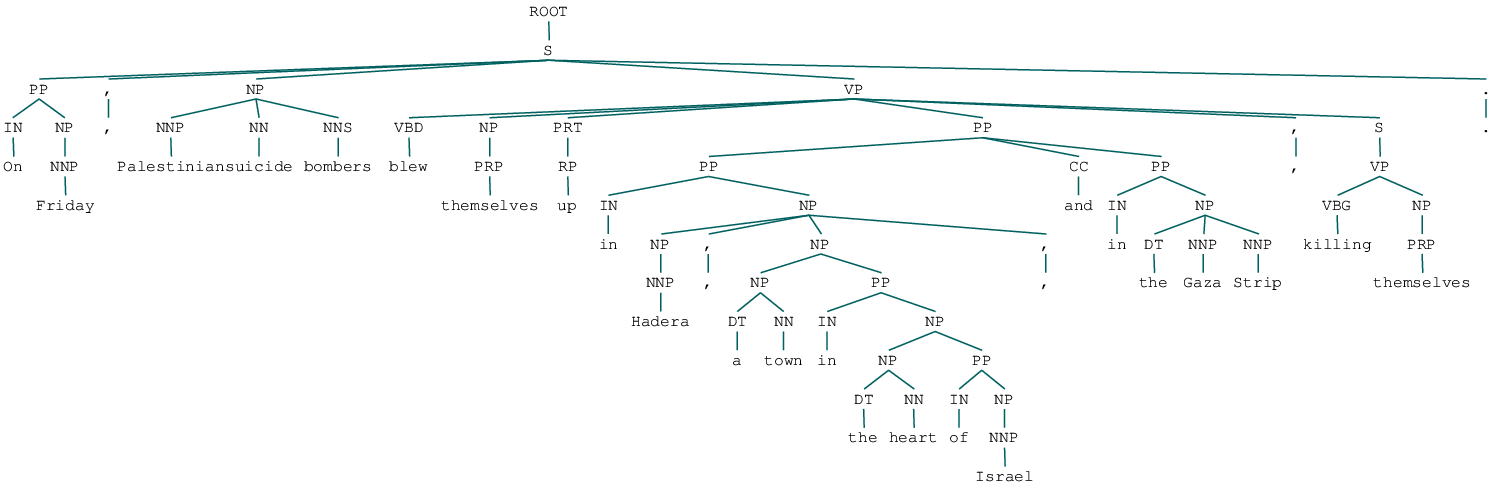

'Text = On Friday , Palestinian suicide bombers blew themselves up in Hadera , a town in the heart of Israel , and in the Gaza Strip , killing themselves .'

'Code = 1831'

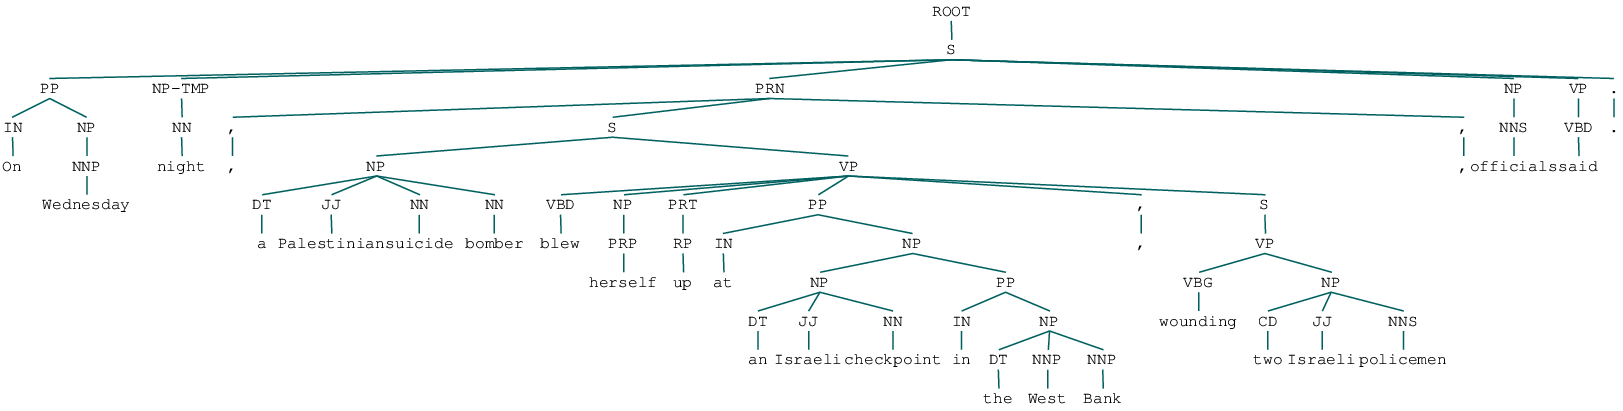

'Text = On Wednesday night , a Palestinian suicide bomber blew herself up at an Israeli checkpoint in the West Bank , wounding two Israeli policemen , officials said .'

'Code = 1831'

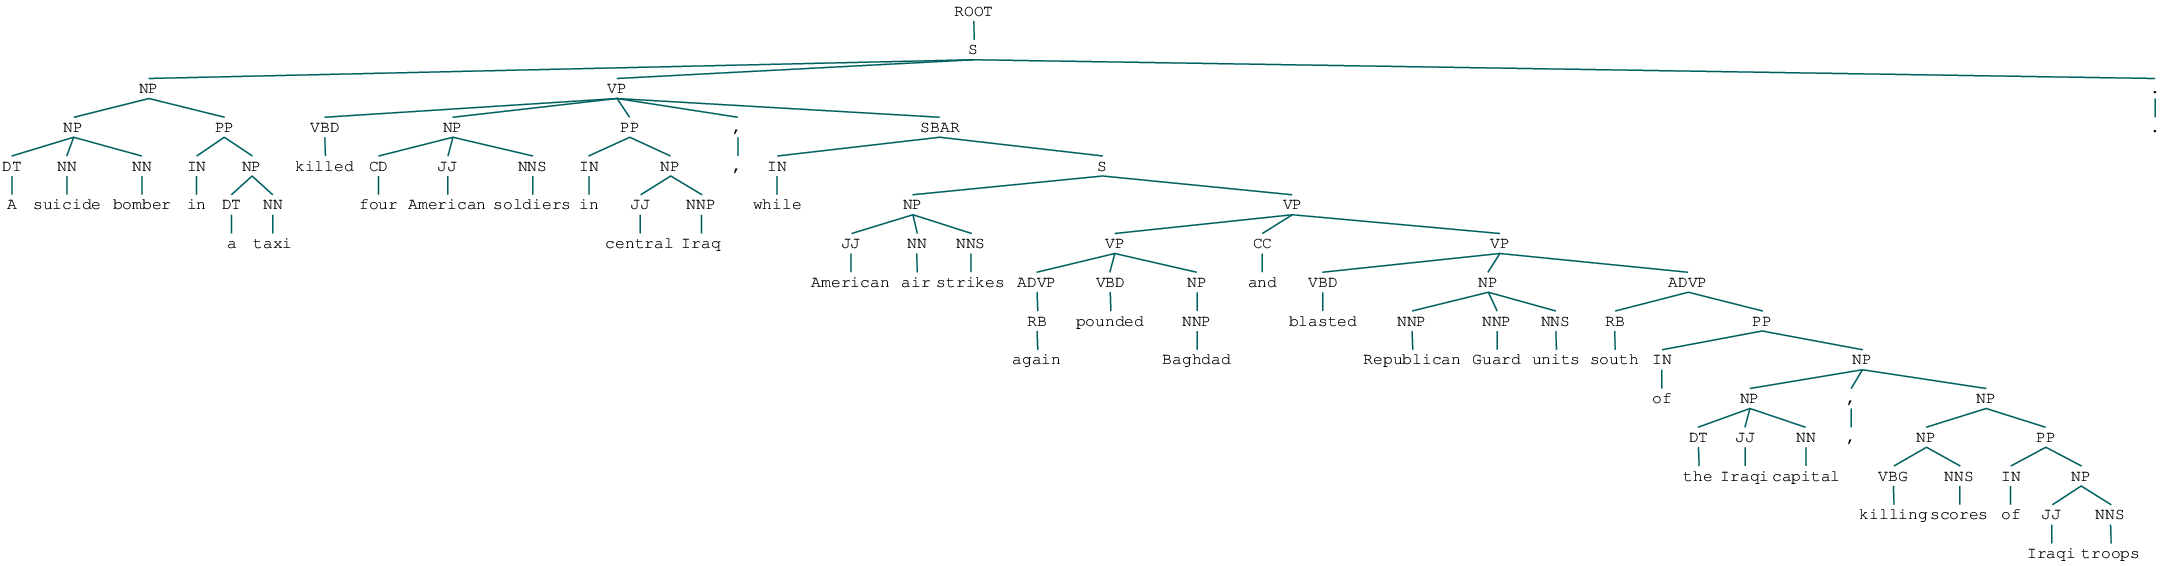

'Text = A suicide bomber in a taxi killed four American soldiers in central Iraq , while American air strikes again pounded Baghdad and blasted Republican Guard units south of the Iraqi capital , killing scores of Iraqi troops .'

'Code = 1831'

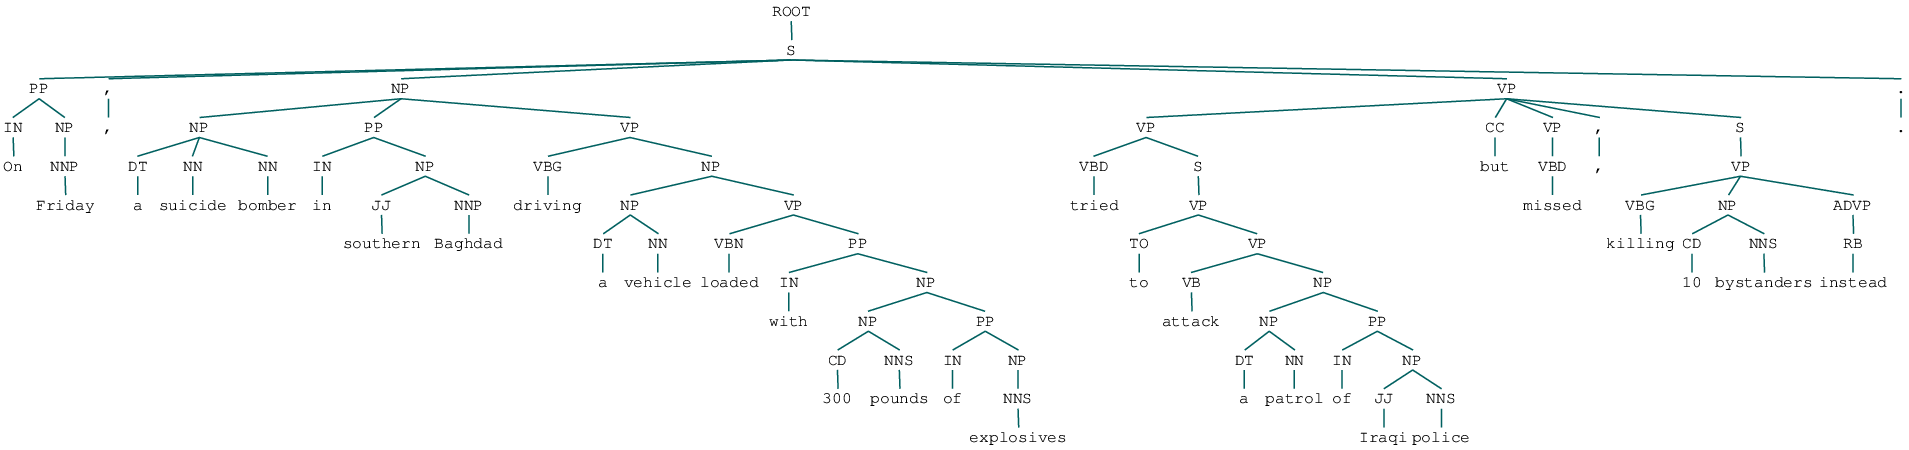

'Text = On Friday , a suicide bomber in southern Baghdad driving a vehicle loaded with 300 pounds of explosives tried to attack a patrol of Iraqi police but missed , killing 10 bystanders instead .'

'Code = 1831'

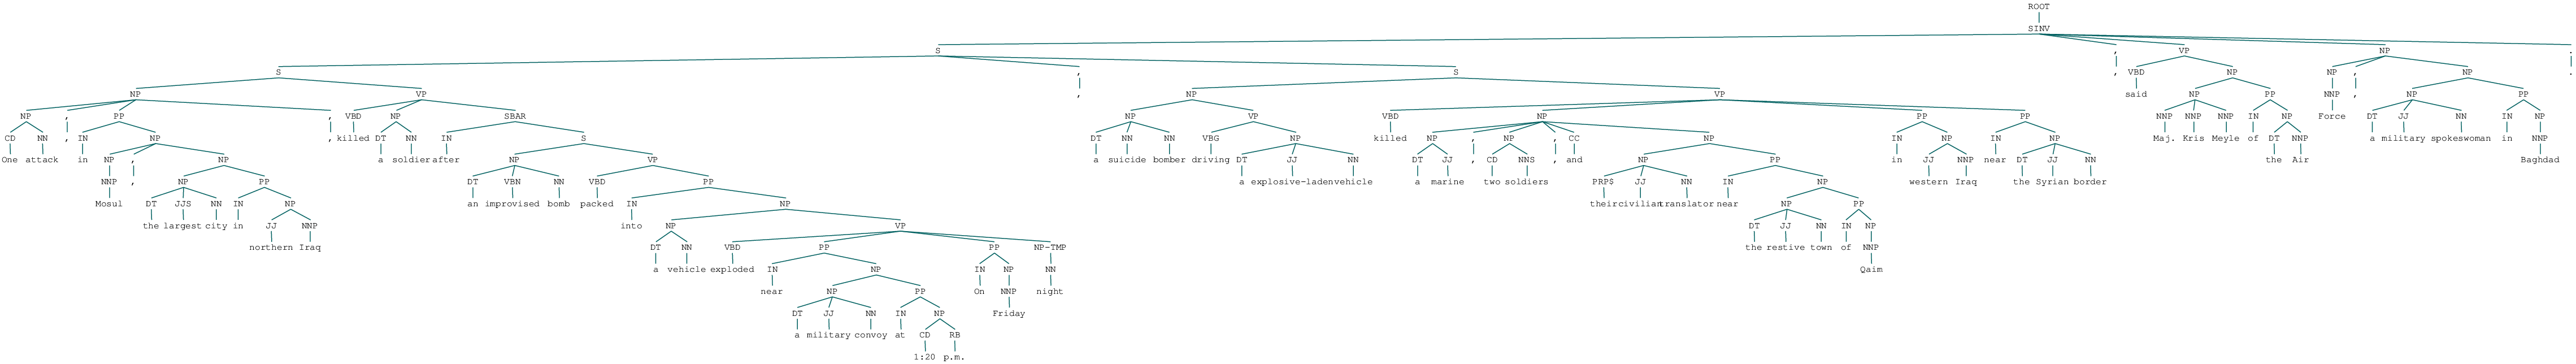

'Text = One attack , in Mosul , the largest city in northern Iraq , killed a soldier after an improvised bomb packed into a vehicle exploded near a military convoy at 1:20 p.m. On Friday night , a suicide bomber driving a explosive-laden vehicle killed a marine , two soldiers , and their civilian translator near the restive town of Qaim in western Iraq near the Syrian border , said Maj. Kris Meyle of the Air Force , a military spokeswoman in Baghdad .'

'Code = 1831'

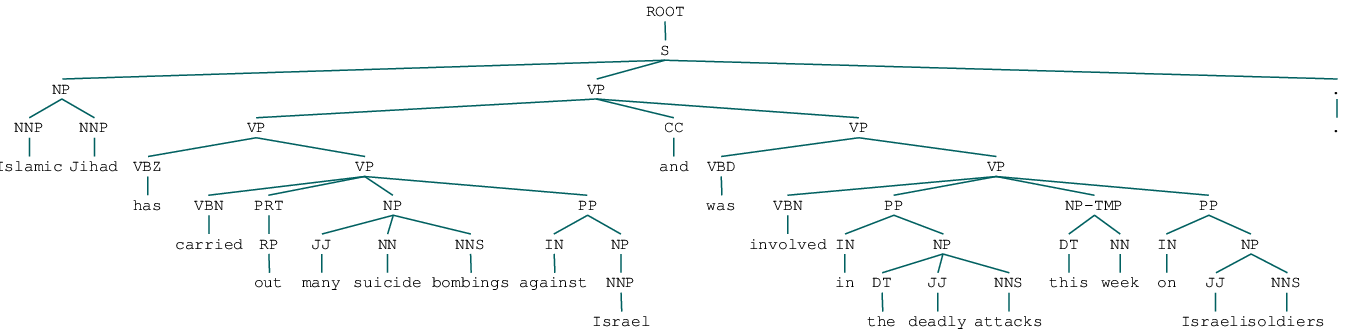

'Text = Islamic Jihad has carried out many suicide bombings against Israel and was involved in the deadly attacks this week on Israeli soldiers .'

'Code = 1831'

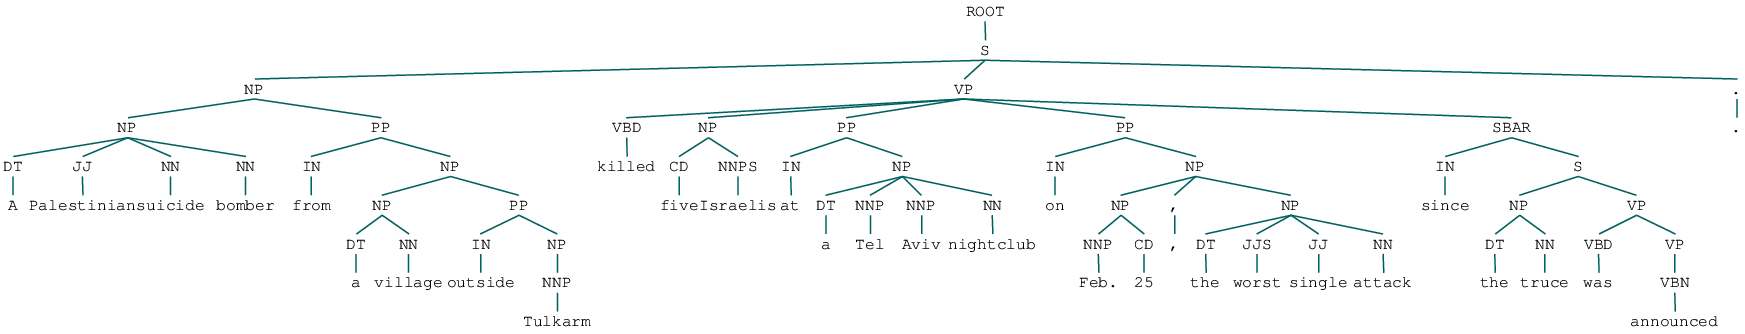

'Text = A Palestinian suicide bomber from a village outside Tulkarm killed five Israelis at a Tel Aviv nightclub on Feb. 25 , the worst single attack since the truce was announced .'

'Code = 1831'

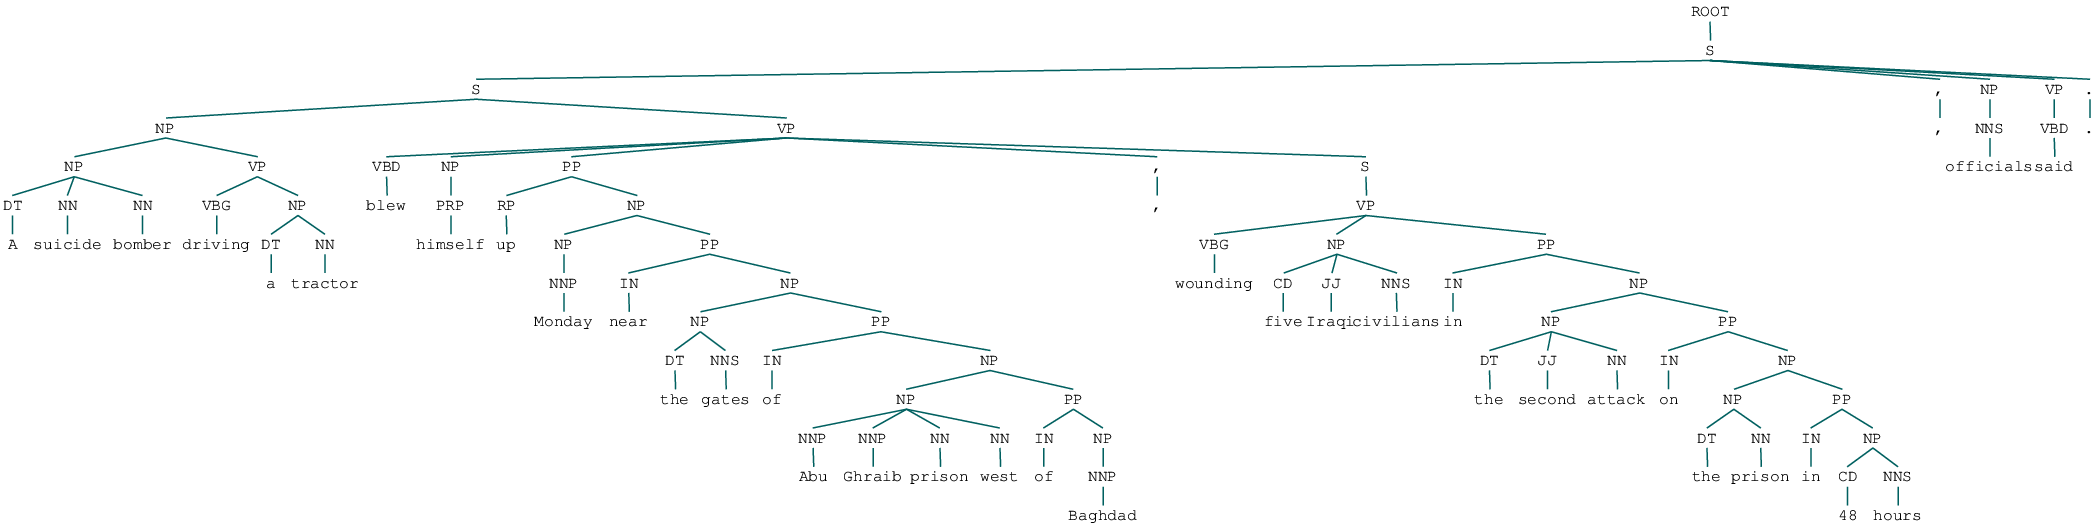

'Text = A suicide bomber driving a tractor blew himself up Monday near the gates of Abu Ghraib prison west of Baghdad , wounding five Iraqi civilians in the second attack on the prison in 48 hours , officials said .'

'Code = 1831'

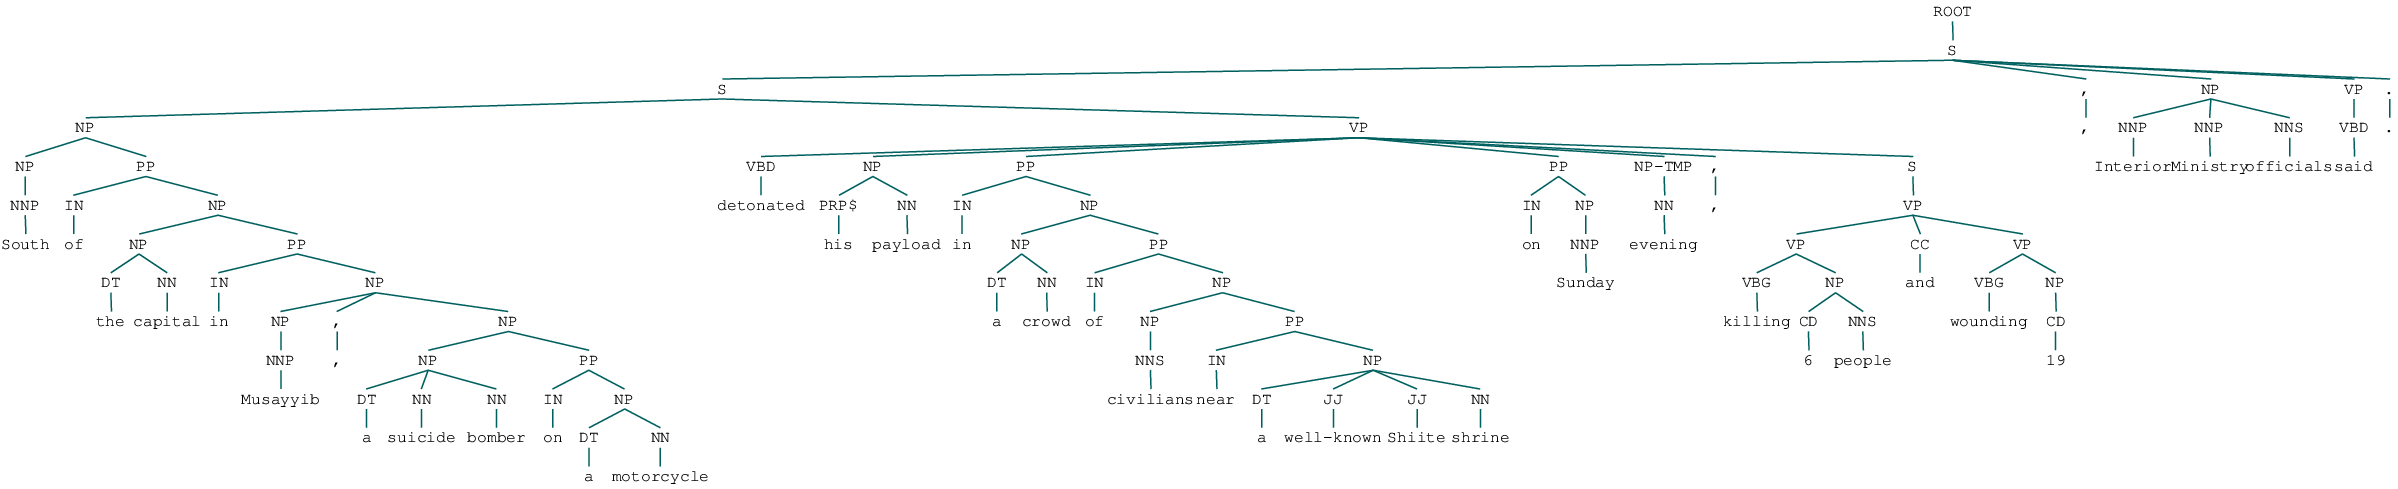

'Text = South of the capital in Musayyib , a suicide bomber on a motorcycle detonated his payload in a crowd of civilians near a well-known Shiite shrine on Sunday evening , killing 6 people and wounding 19 , Interior Ministry officials said .'

'Code = 1831'

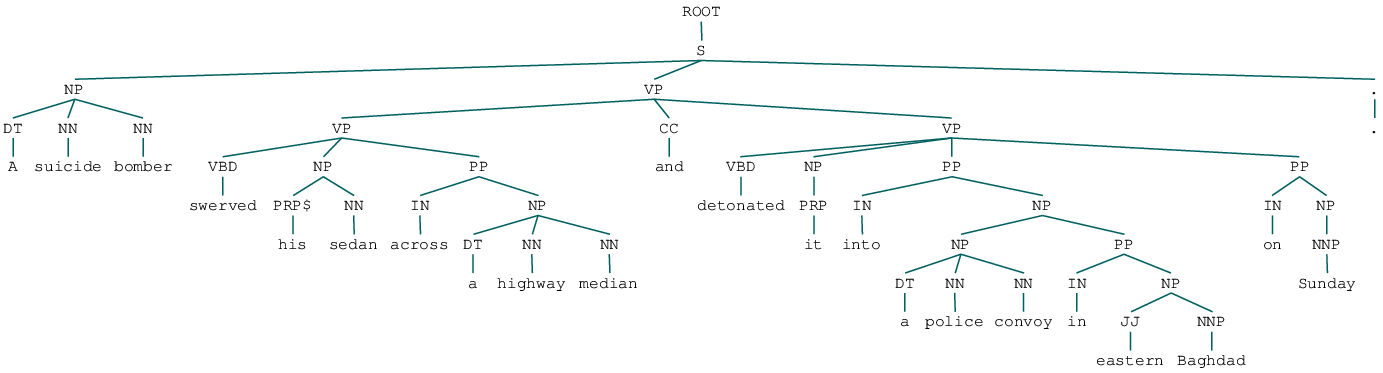

'Text = A suicide bomber swerved his sedan across a highway median and detonated it into a police convoy in eastern Baghdad on Sunday .'

'Code = 1831'

In [123]:
for i in range(len(petrarch2_1831_same_code)):
    parsed_output(petrarch2_1831_same_code, i)

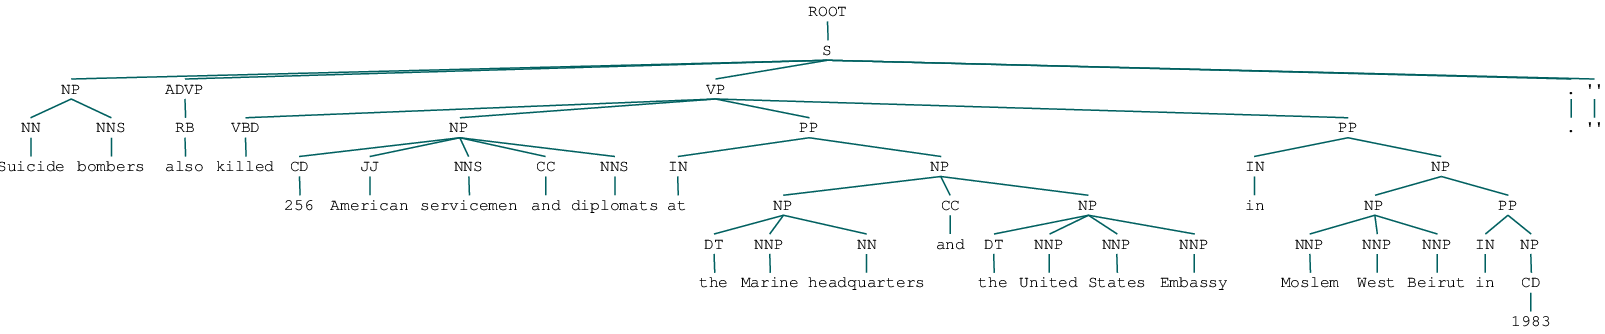

'Text = Suicide bombers also killed 256 American servicemen and diplomats at the Marine headquarters and the United States Embassy in Moslem West Beirut in 1983."'

'Code = 1831'

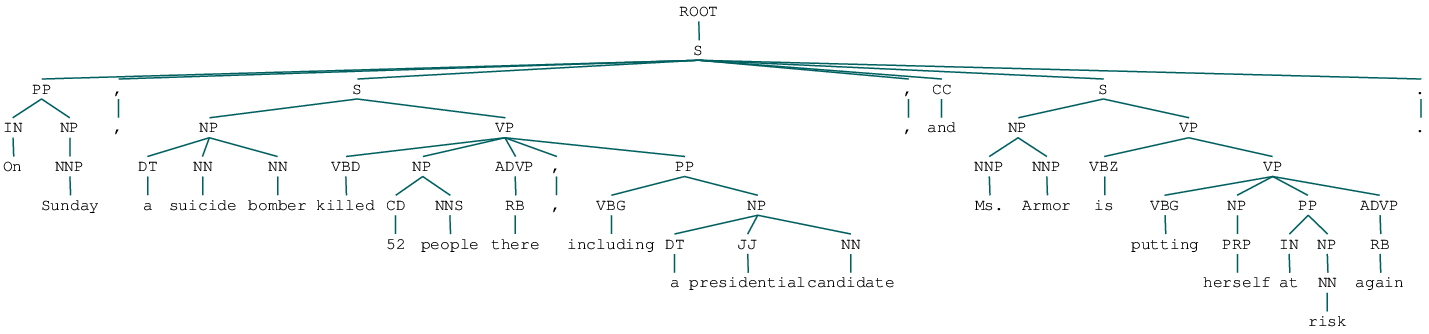

'Text = On Sunday, a suicide bomber killed 52 people there, including a presidential candidate, and Ms. Armor is putting herself at risk again.'

'Code = 1831'

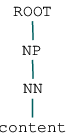

'Text = content\r"Sri Lanka\'s ethnic warfare intensified on two crucial battlefronts on Nov 11, 1995, with the Tamil Tiger rebels mounting a suicide bombing attack in the capital city of Colombo that killed at least 17 people and with the government pressing an offensive on the Jaffna peninsula that caused nearly 900 casualties in 48 hours."'

'Code = 1831'

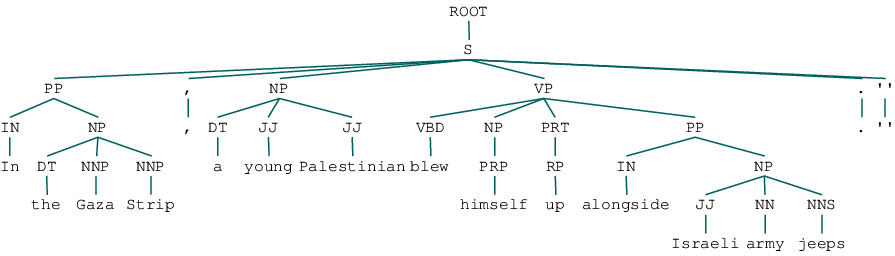

'Text = In the Gaza Strip, a young Palestinian blew himself up alongside Israeli army jeeps."'

'Code = 1831'

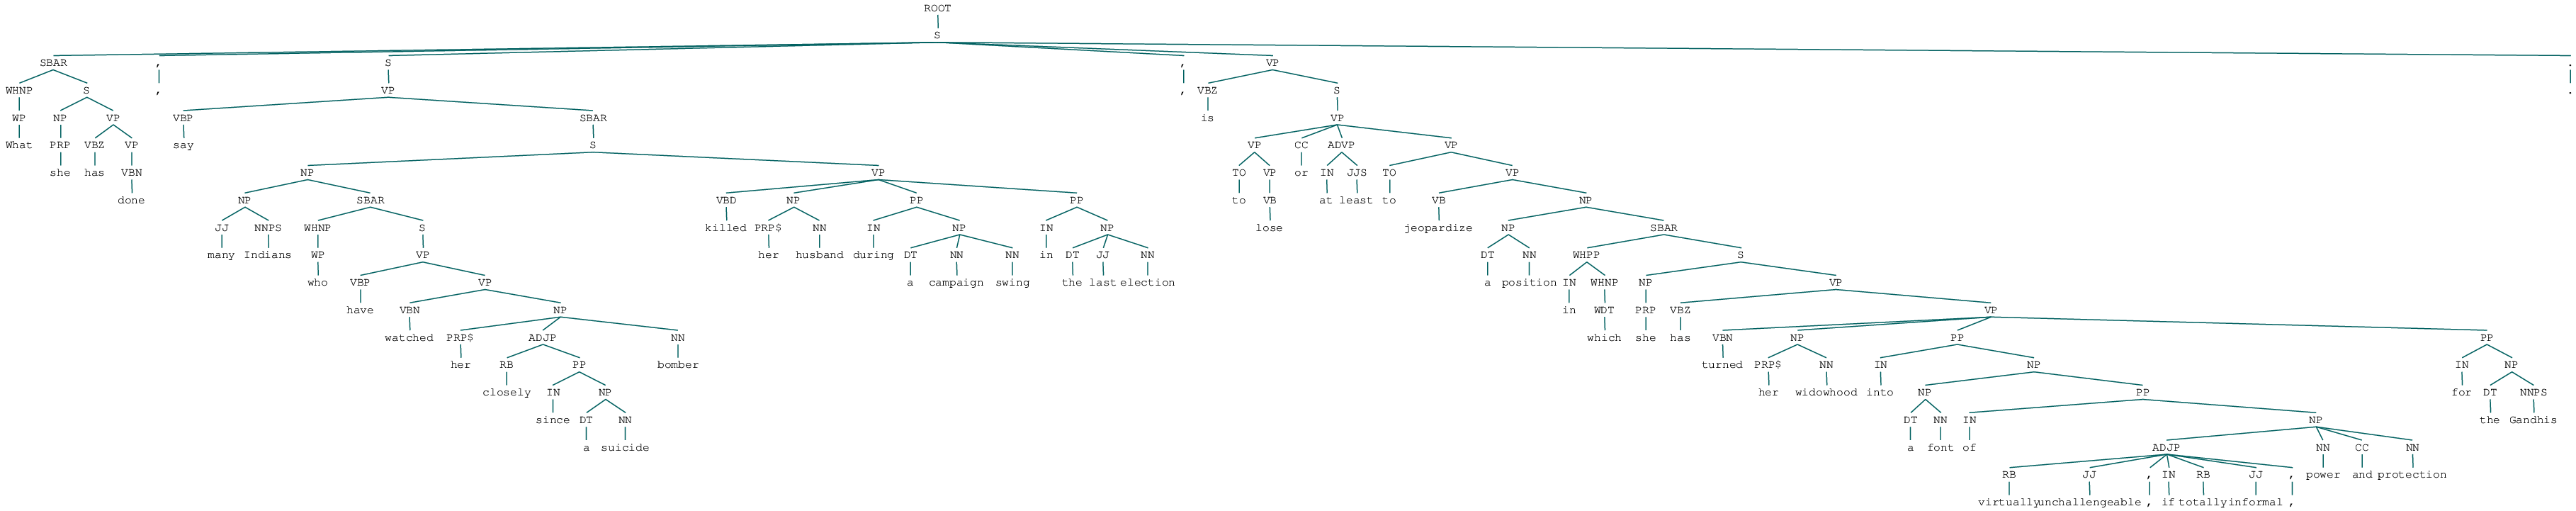

'Text = What she has done, say many Indians who have watched her closely since a suicide bomber killed her husband during a campaign swing in the last election, is to lose or at least to jeopardize a position in which she has turned her widowhood into a font of virtually unchallengeable, if totally informal, power and protection for the Gandhis.'

'Code = 1831'

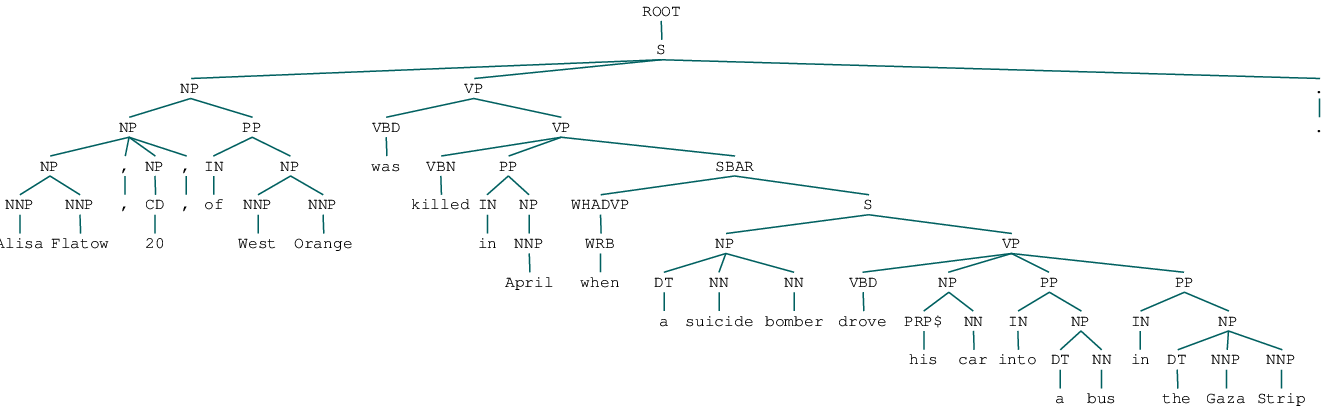

'Text = Alisa Flatow, 20, of West Orange was killed in April when a suicide bomber drove his car into a bus in the Gaza Strip.'

'Code = 1831'

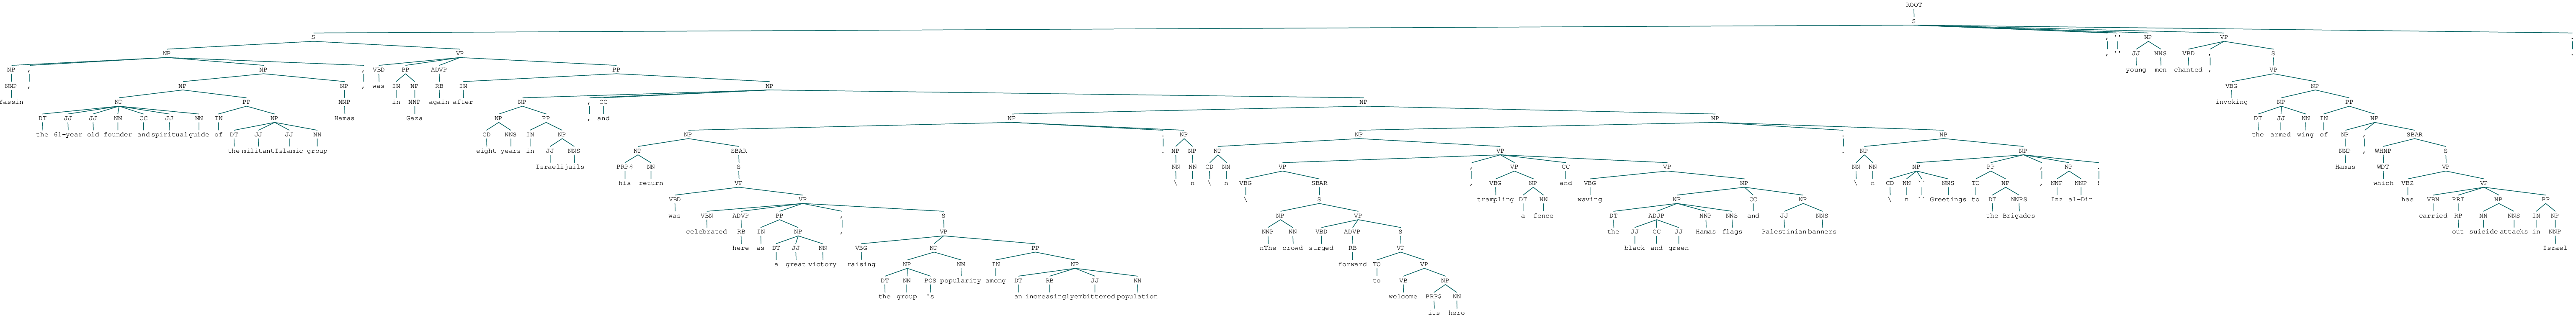

"Text = Yassin, the 61-year old founder and spiritual guide of the militant Islamic group Hamas, was in Gaza again after eight years in Israeli jails, and his return was celebrated here as a great victory, raising the group's popularity among an increasingly embittered population.\\n\\n\\nThe crowd surged forward to welcome its hero, trampling a fence and waving the black and green Hamas flags and Palestinian banners.\\n\\n''Greetings to the Brigades, Izz al-Din!,'' young men chanted, invoking the armed wing of Hamas, which has carried out suicide attacks in Israel."

'Code = 1831'

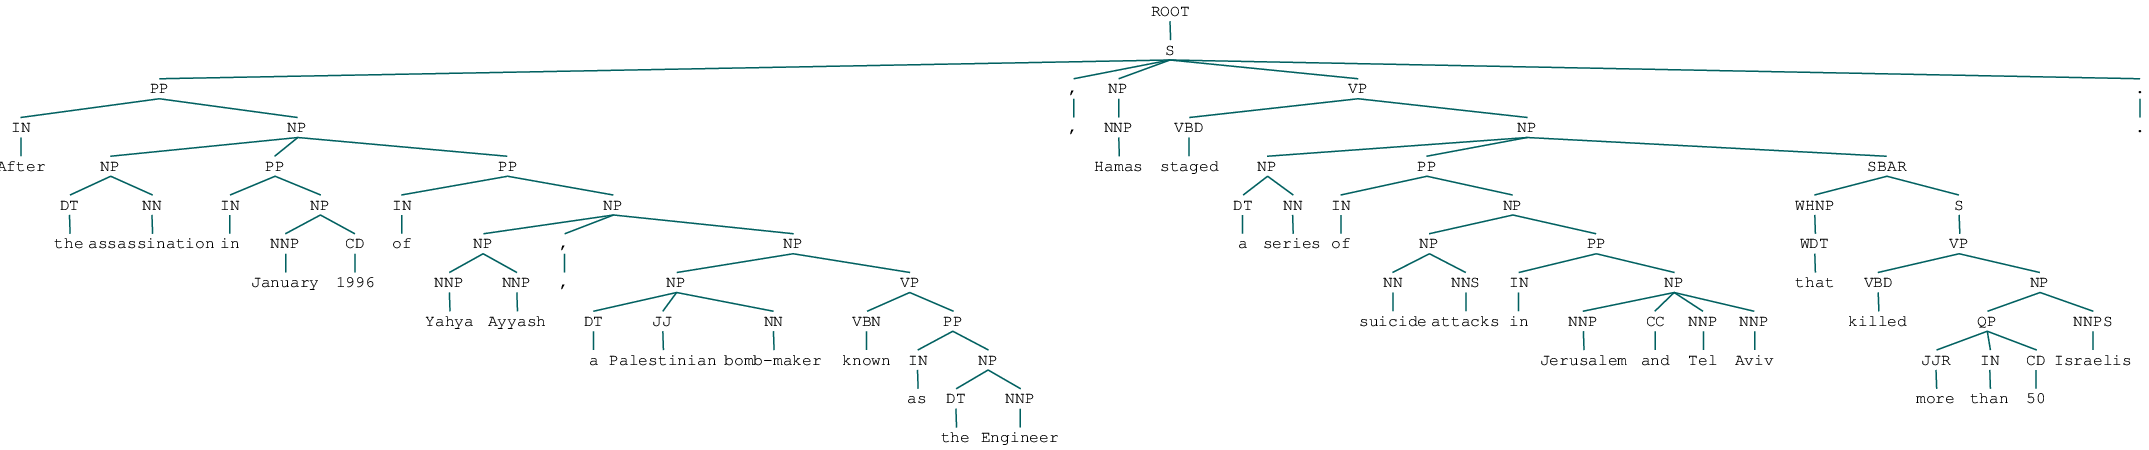

'Text = After the assassination in January 1996 of Yahya Ayyash, a Palestinian bomb-maker known as the Engineer, Hamas staged a series of suicide attacks in Jerusalem and Tel Aviv that killed more than 50 Israelis.'

'Code = 1831'

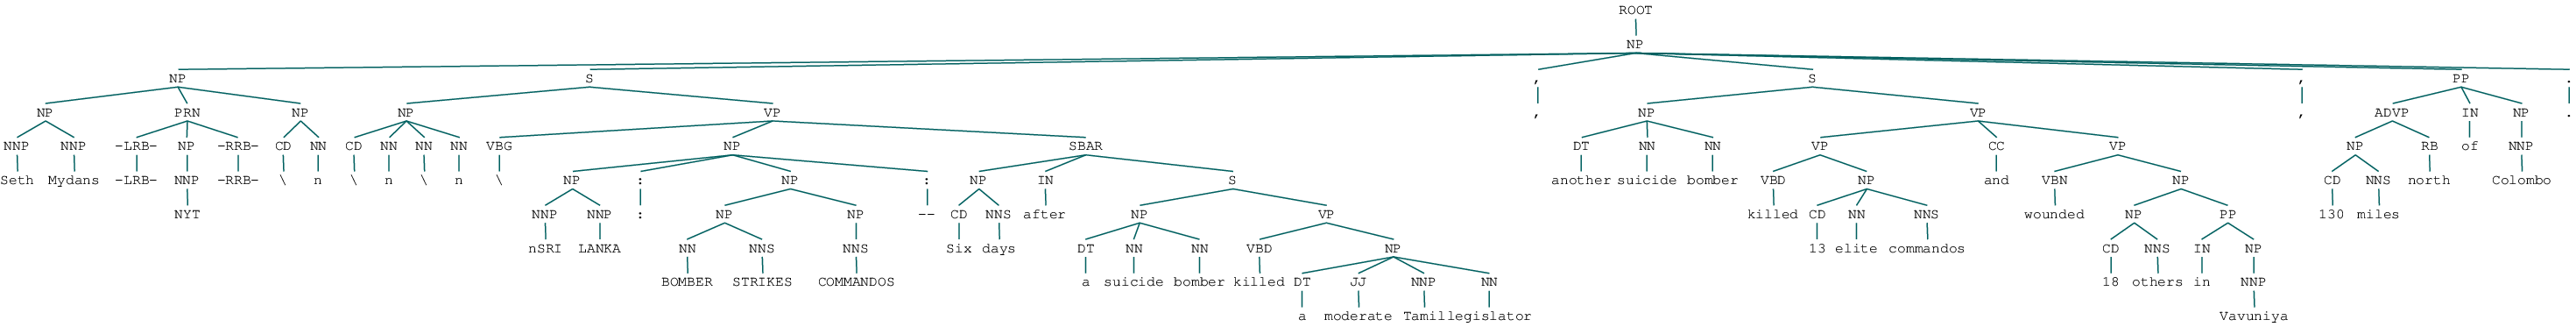

'Text = Seth Mydans (NYT)\\n\\n\\n\\nSRI LANKA: BOMBER STRIKES COMMANDOS -- Six days after a suicide bomber killed a moderate Tamil legislator, another suicide bomber killed 13 elite commandos and wounded 18 others in Vavuniya, 130 miles north of Colombo.'

'Code = 1831'

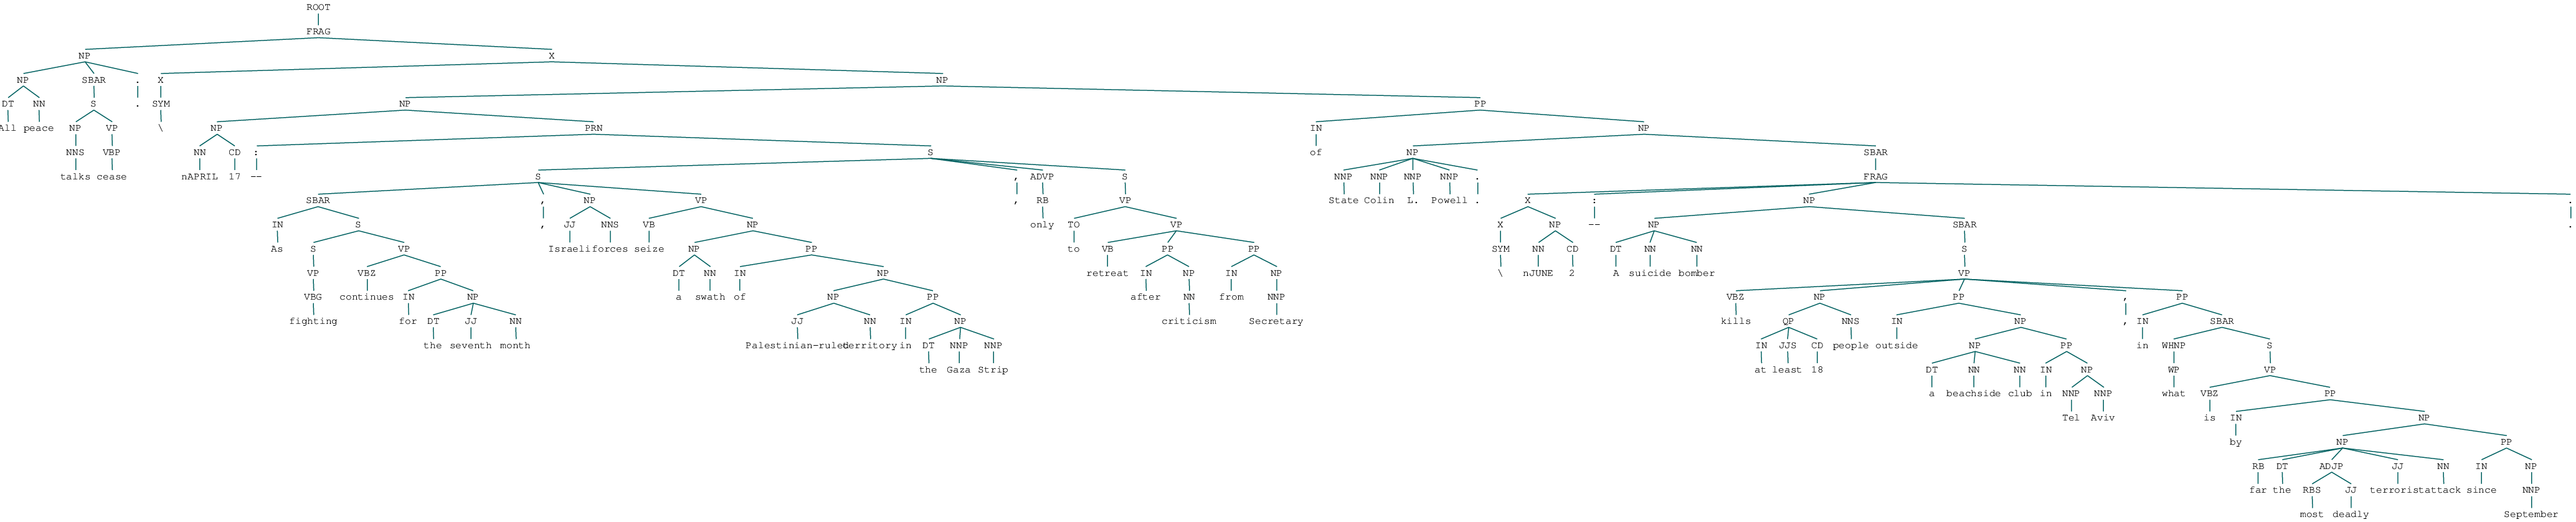

'Text = All peace talks cease.\\nAPRIL 17 -- As fighting continues for the seventh month, Israeli forces seize a swath of Palestinian-ruled territory in the Gaza Strip, only to retreat after criticism from Secretary of State Colin L. Powell.\\nJUNE 2 -- A suicide bomber kills at least 18 people outside a beachside club in Tel Aviv, in what is by far the most deadly terrorist attack since September.'

'Code = 1831'

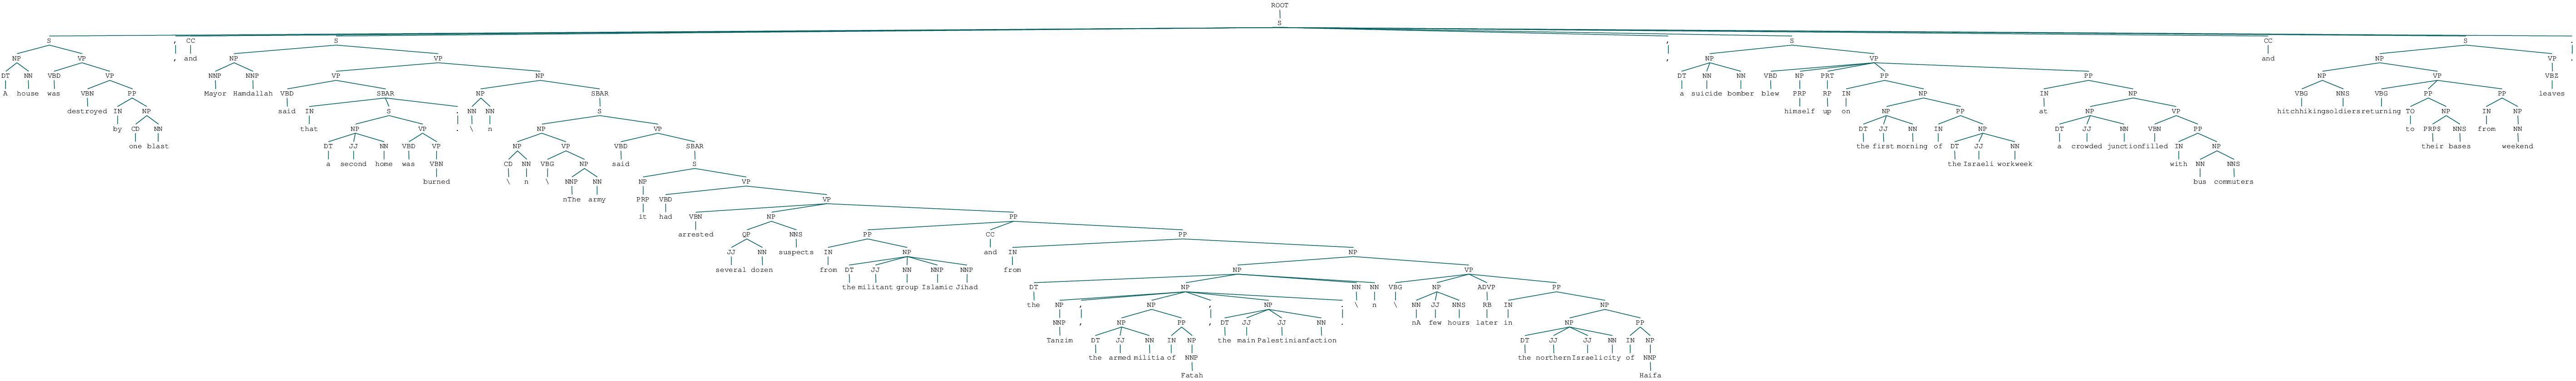

'Text = A house was destroyed by one blast, and Mayor Hamdallah said that a second home was burned.\\n\\n\\nThe army said it had arrested several dozen suspects from the militant group Islamic Jihad and from the Tanzim, the armed militia of Fatah, the main Palestinian faction.\\n\\nA few hours later in the northern Israeli city of Haifa, a suicide bomber blew himself up on the first morning of the Israeli workweek at a crowded junction filled with bus commuters and hitchhiking soldiers returning to their bases from weekend leaves.'

'Code = 1831'

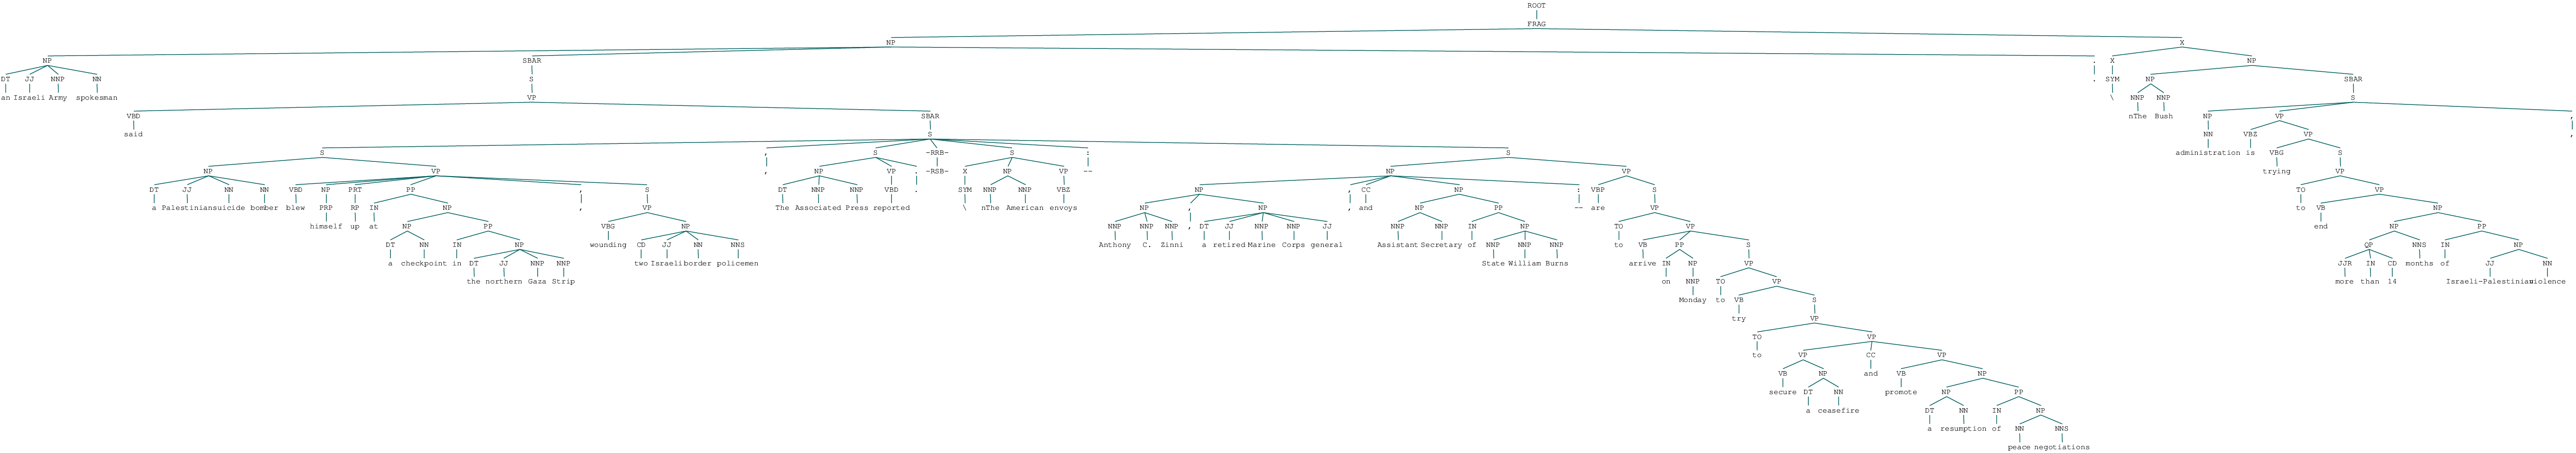

'Text =  an Israeli Army spokesman said a Palestinian suicide bomber blew himself up at a checkpoint in the northern Gaza Strip, wounding two Israeli border  policemen, The Associated Press reported.]\\nThe American envoys -- Anthony C. Zinni, a retired Marine Corps general, and Assistant Secretary of State William Burns -- are to arrive on Monday to try to secure a ceasefire and promote a resumption of peace negotiations.\\nThe Bush administration is trying to end more than 14 months of Israeli-Palestinian violence,'

'Code = 1831'

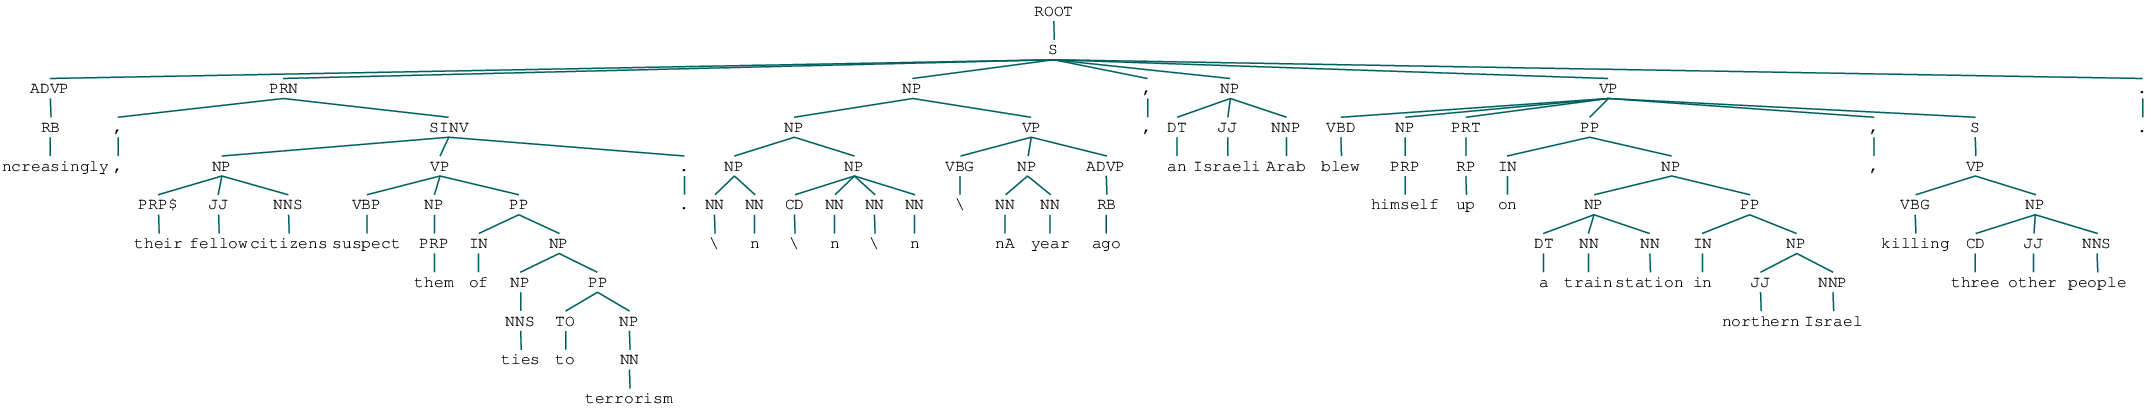

'Text = Increasingly, their fellow citizens suspect them of ties to terrorism.\\n\\n\\n\\nA year ago, an Israeli Arab blew himself up on a train station in northern Israel, killing three other people.'

'Code = 1831'

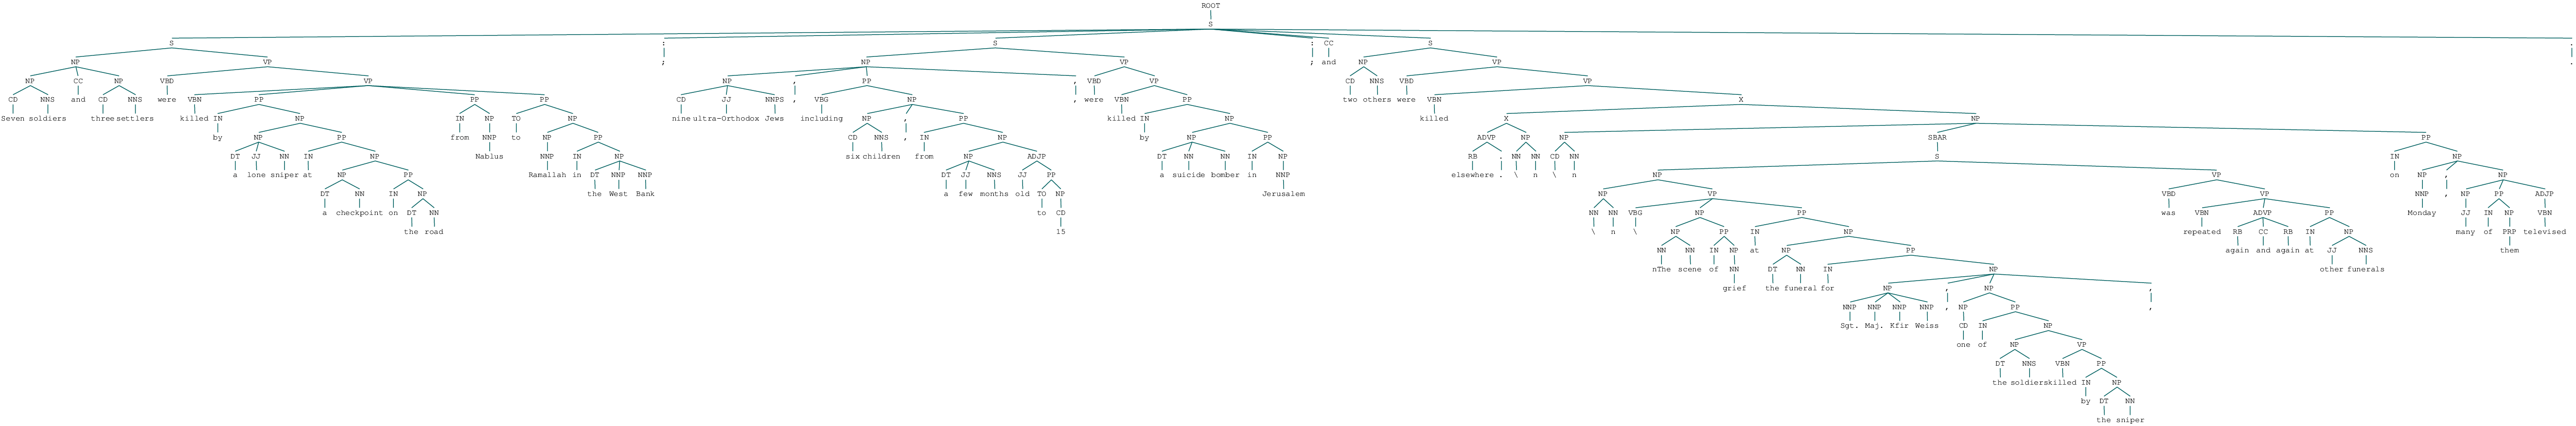

'Text = Seven soldiers and three settlers were killed by a lone sniper at a checkpoint on the road from Nablus to Ramallah in the West Bank; nine ultra-Orthodox Jews, including six children, from a few months old to 15, were killed by a suicide bomber in Jerusalem; and two others were killed elsewhere.\\n\\n\\n\\nThe scene of grief at the funeral for Sgt. Maj. Kfir Weiss, one of the soldiers killed by the sniper, was repeated again and again at other funerals on Monday, many of them televised.'

'Code = 1831'

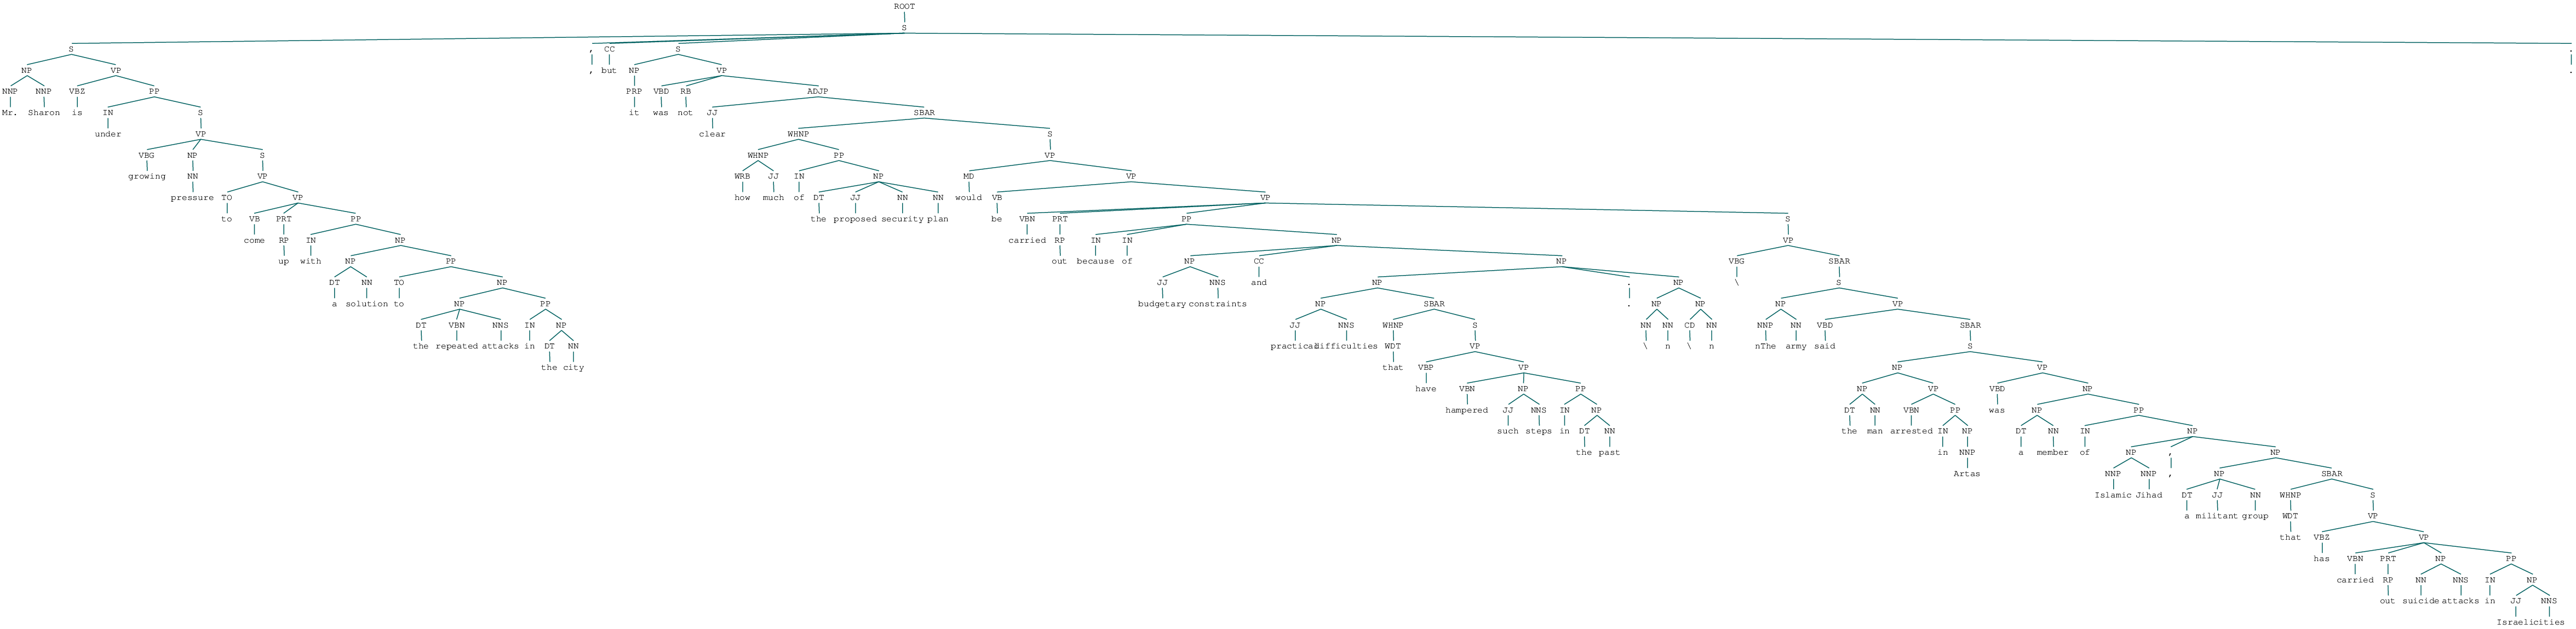

'Text = Mr. Sharon is under growing pressure to come up with a solution to the repeated attacks in the city, but it was not clear how much of the proposed security plan would be carried out because of budgetary constraints and practical difficulties that have hampered such steps in the past.\\n\\n\\nThe army said the man arrested in Artas was a member of Islamic Jihad, a militant group that has carried out suicide attacks in Israeli cities.'

'Code = 1831'

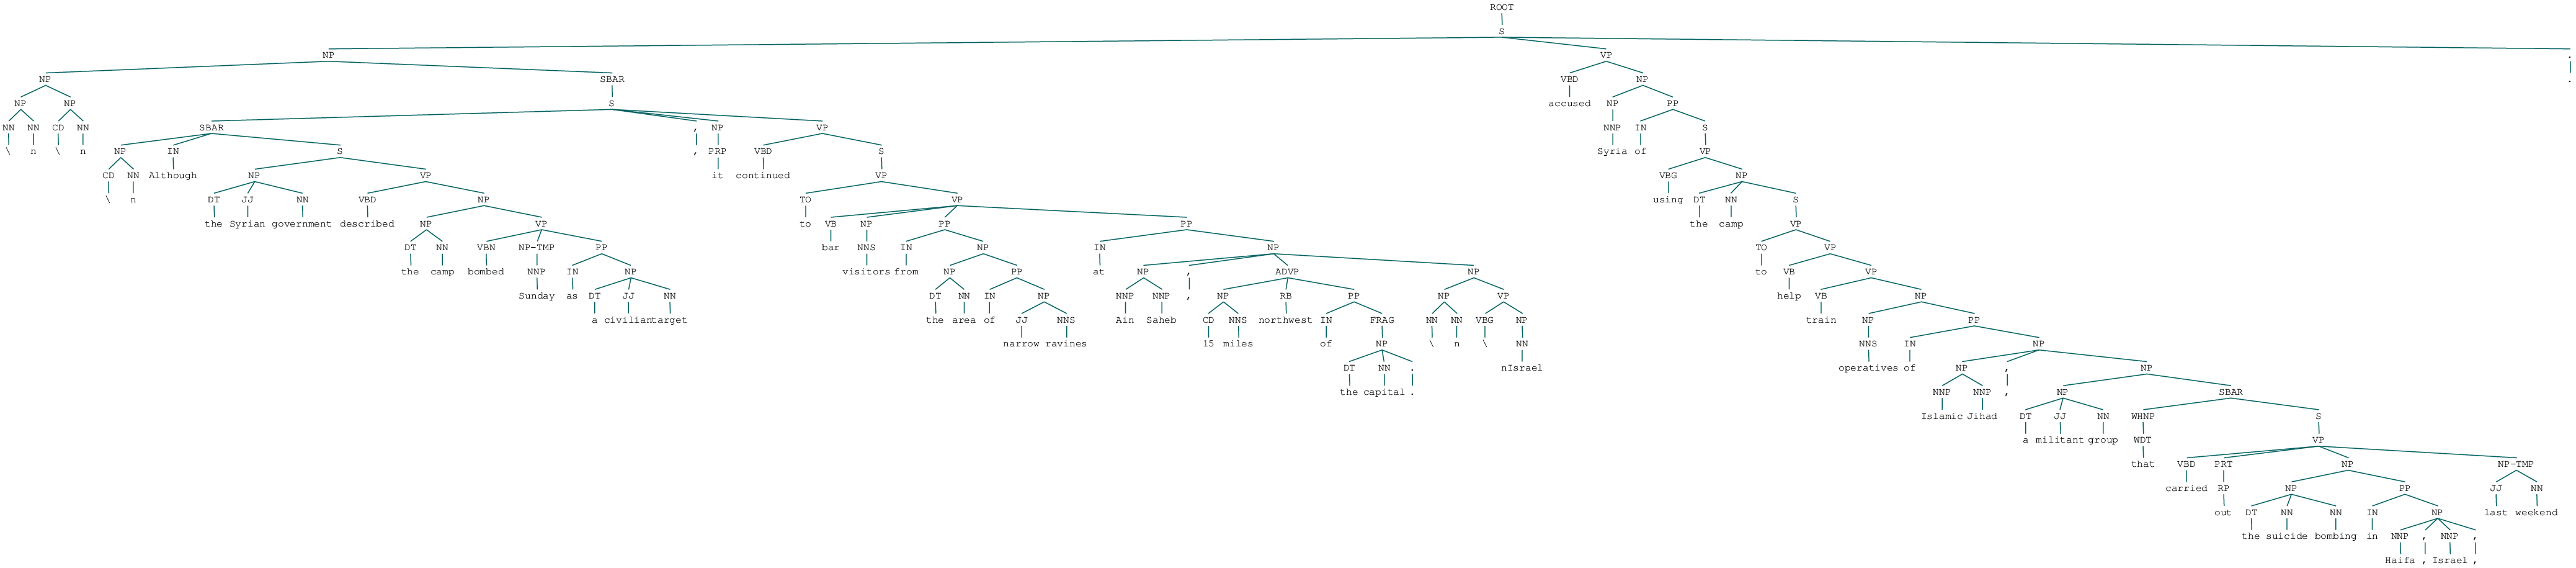

'Text = \\n\\n\\n Although the Syrian government described the camp bombed Sunday as a civilian target, it continued to bar visitors from the area of narrow ravines at Ain Saheb, 15 miles northwest of the capital.\\n\\nIsrael accused Syria of using the camp to help train operatives of Islamic Jihad, a militant group that carried out the suicide bombing in Haifa, Israel, last weekend.'

'Code = 1831'

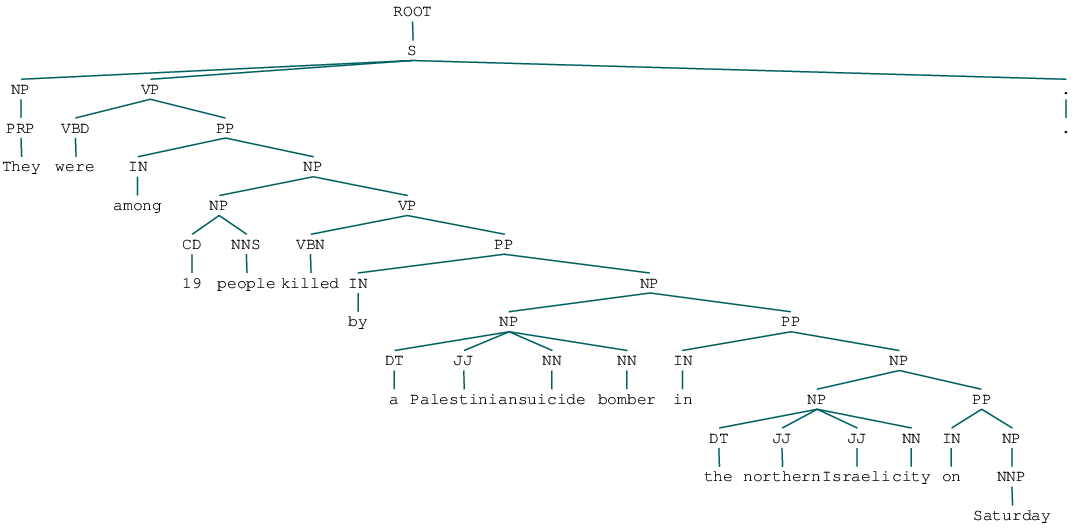

'Text = They were among 19 people killed by a Palestinian suicide bomber in the northern Israeli city on Saturday.'

'Code = 1831'

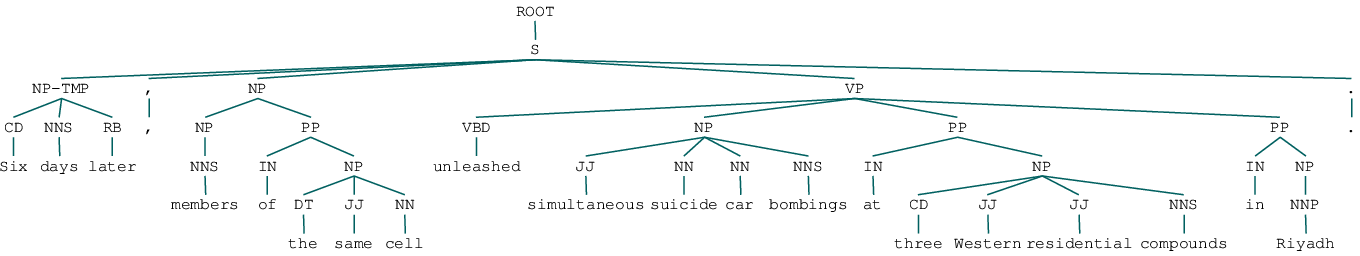

'Text = Six days later, members of the same cell unleashed simultaneous suicide car bombings at three Western residential compounds in Riyadh.'

'Code = 1831'

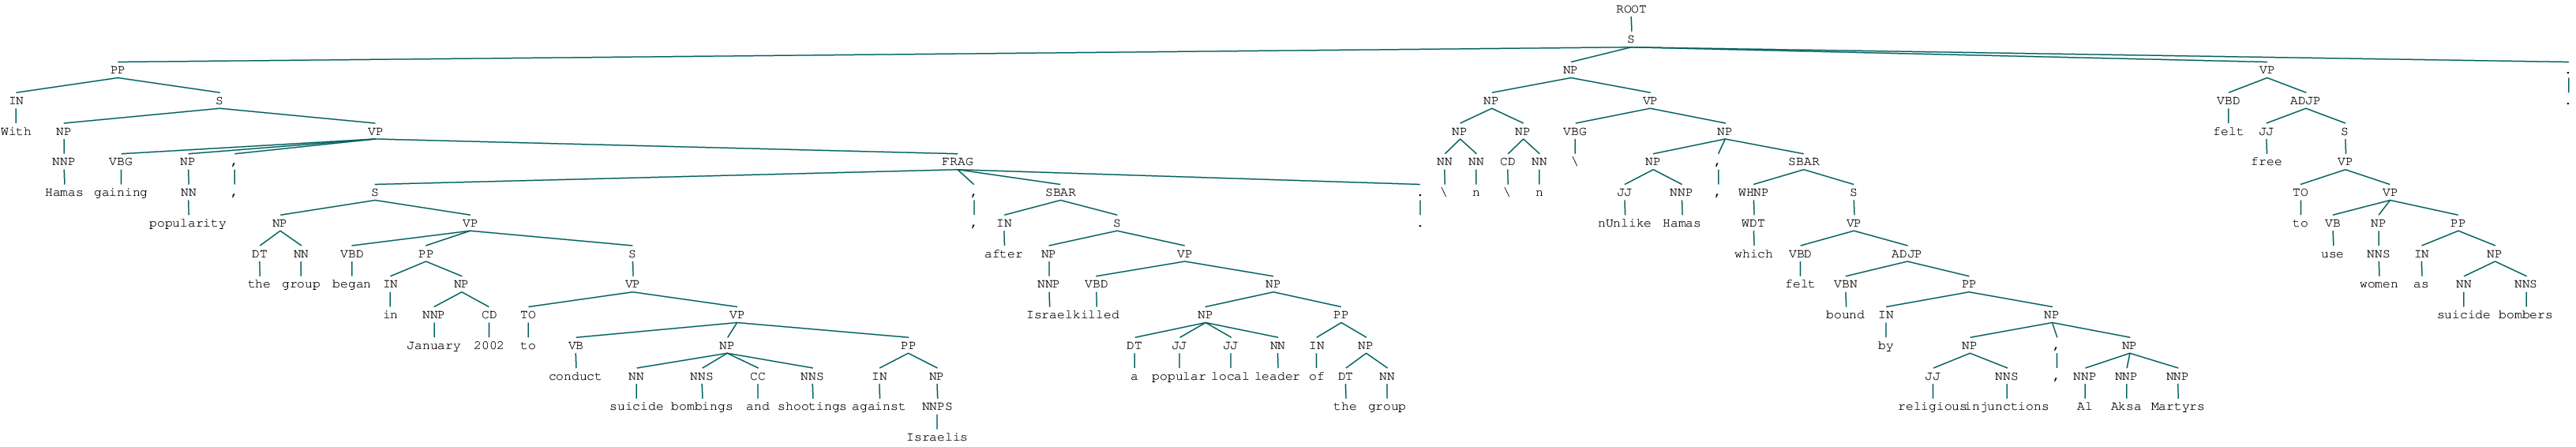

'Text = With Hamas gaining popularity, the group began in January 2002 to conduct suicide bombings and shootings against Israelis, after Israel killed a popular local leader of the group.\\n\\n\\nUnlike Hamas, which felt bound by religious injunctions, Al Aksa Martyrs felt free to use women as suicide bombers.'

'Code = 1831'

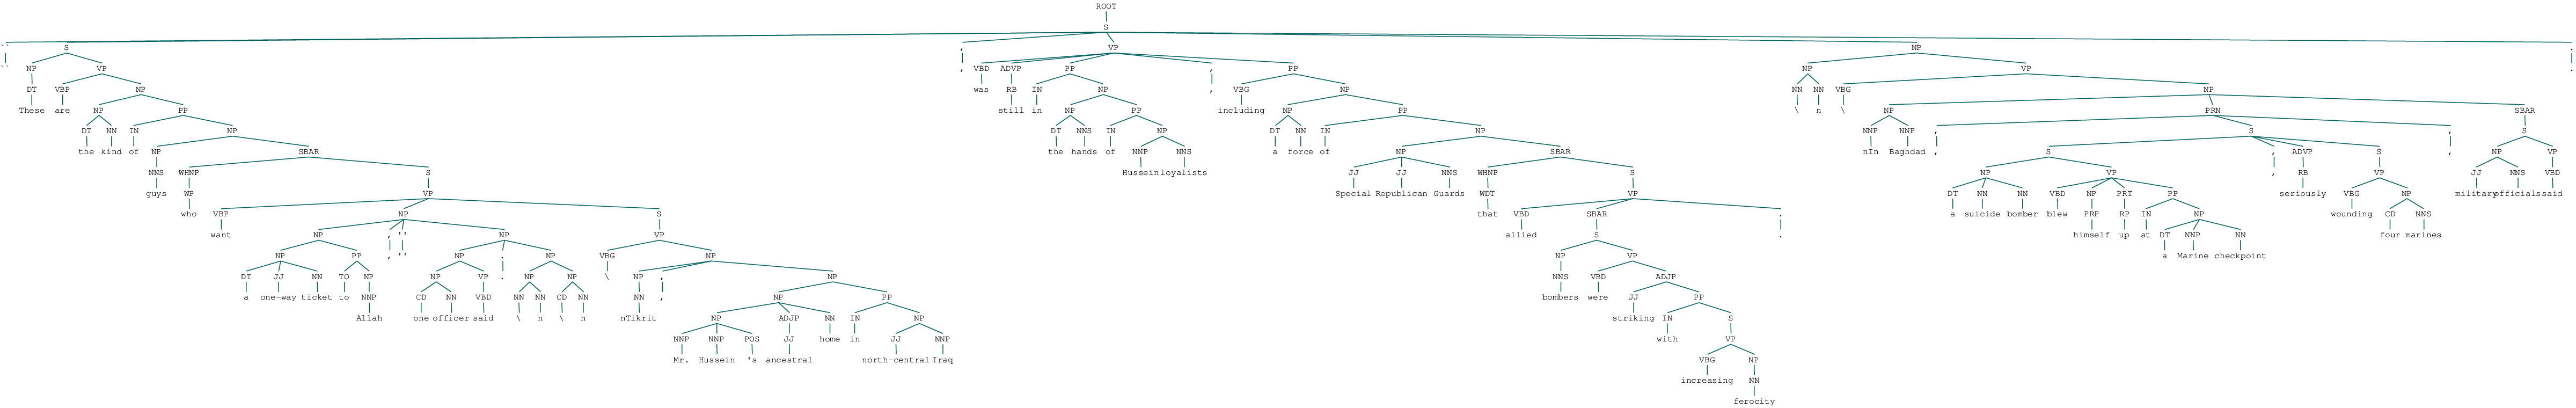

"Text = ''These are the kind of guys who want a one-way ticket to Allah,'' one officer said.\\n\\n\\nTikrit, Mr. Hussein's ancestral home in north-central Iraq, was still in the hands of Hussein loyalists, including a force of Special Republican Guards that allied bombers were striking with increasing ferocity.\\n\\nIn Baghdad, a suicide bomber blew himself up at a Marine checkpoint, seriously wounding four marines, military officials said."

'Code = 1831'

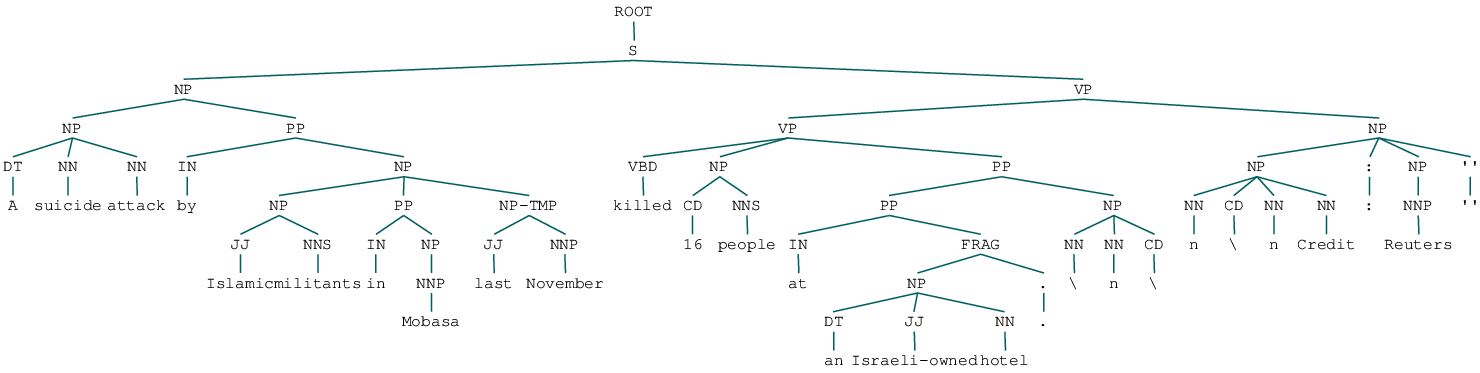

'Text = A suicide attack by Islamic militants in Mobasa last November killed 16 people at an Israeli-owned hotel.\\n\\n\\n Credit: Reuters"'

'Code = 1831'

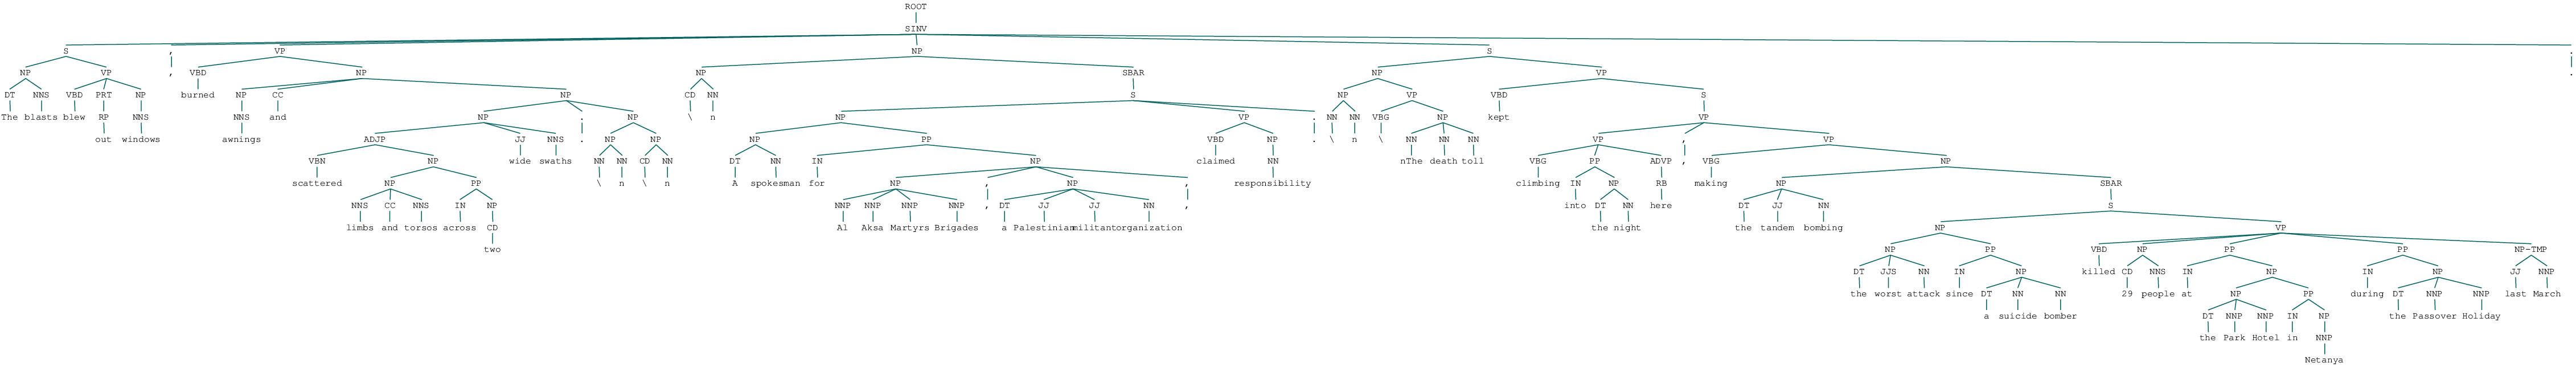

'Text = The blasts blew out windows, burned awnings and scattered limbs and torsos across two wide swaths.\\n\\n\\n A spokesman for Al Aksa Martyrs Brigades, a Palestinian militant organization, claimed responsibility.\\n\\nThe death toll kept climbing into the night here, making the tandem bombing the worst attack since a suicide bomber killed 29 people at the Park Hotel in Netanya during the Passover Holiday last March.'

'Code = 1831'

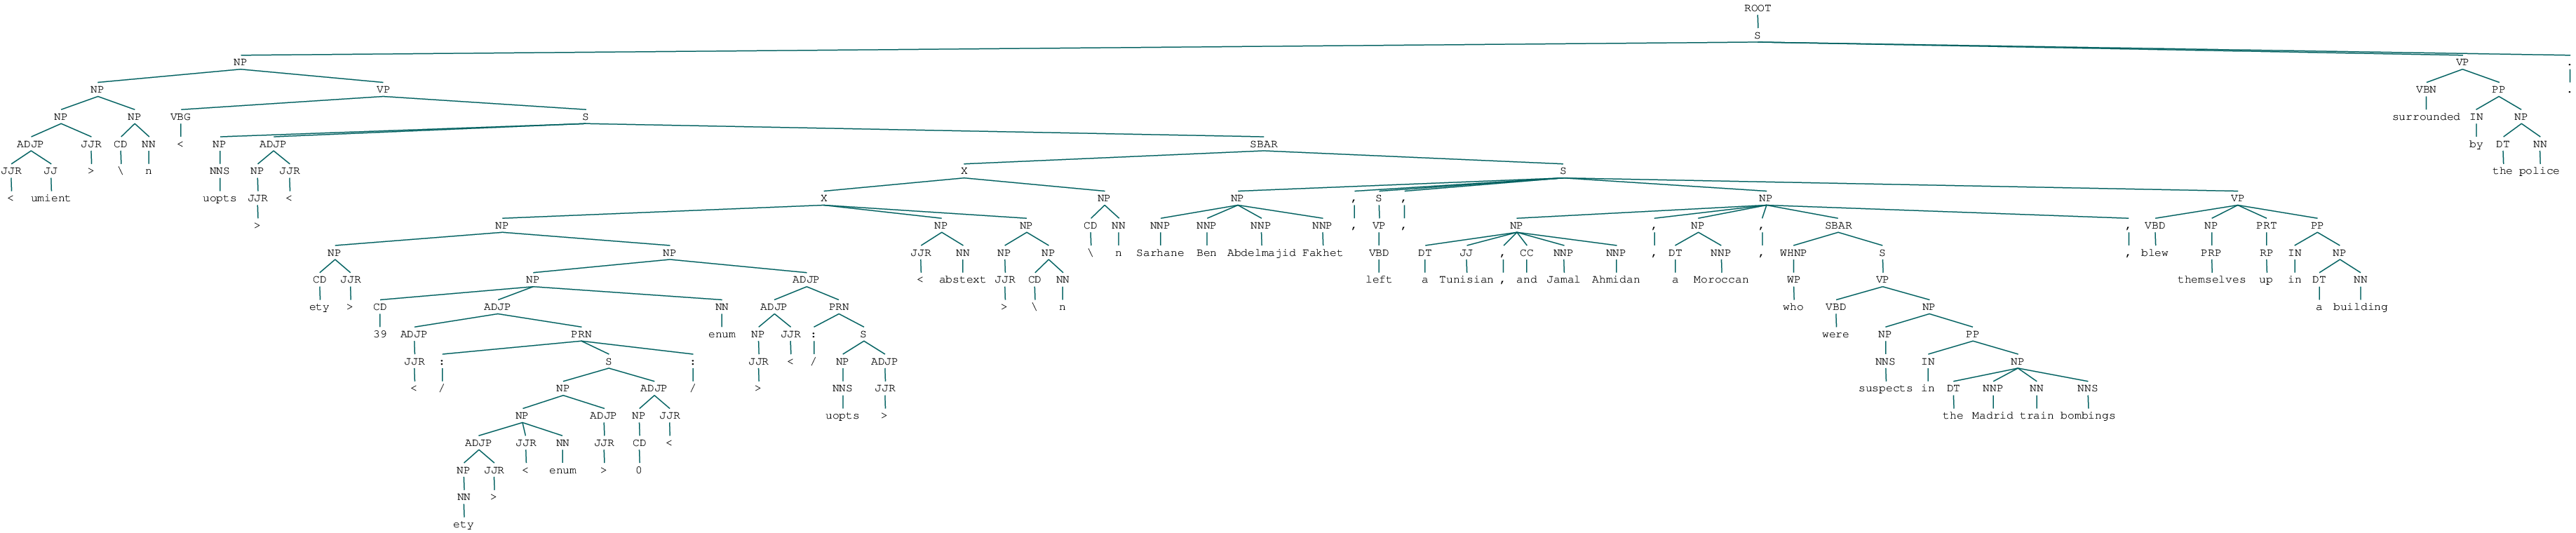

'Text = &lt;umient&gt;\\n&lt;uopts&gt;&lt;ety&gt;39&lt;/ety&gt;&lt;enum&gt;0&lt;/enum&gt;&lt;/uopts&gt;&lt;abstext&gt;\\n\\n Sarhane Ben Abdelmajid Fakhet, left, a Tunisian, and Jamal Ahmidan, a Moroccan, who were suspects in the Madrid train bombings, blew themselves up in a building surrounded by the police.'

'Code = 1831'

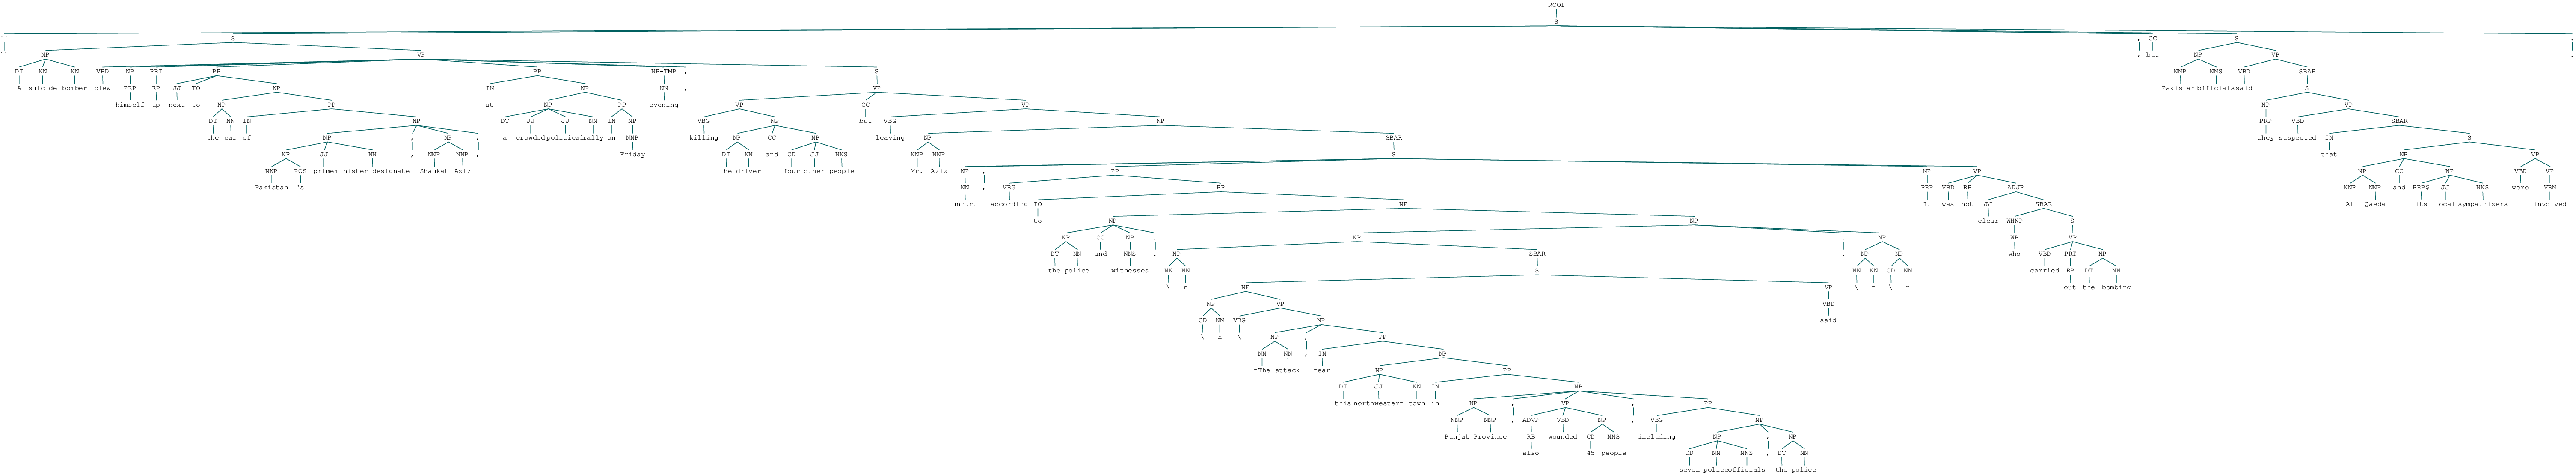

'Text = "A suicide bomber blew himself up next to the car of Pakistan\'s prime minister-designate, Shaukat Aziz, at a crowded political rally on Friday evening, killing the driver and four other people but leaving Mr. Aziz unhurt, according to the police and witnesses.\\n\\n\\nThe attack, near this northwestern town in Punjab Province, also wounded 45 people, including seven police officials, the police said.\\n\\n It was not clear who carried out the bombing, but Pakistani officials said they suspected that Al Qaeda and its local sympathizers were involved.'

'Code = 1831'

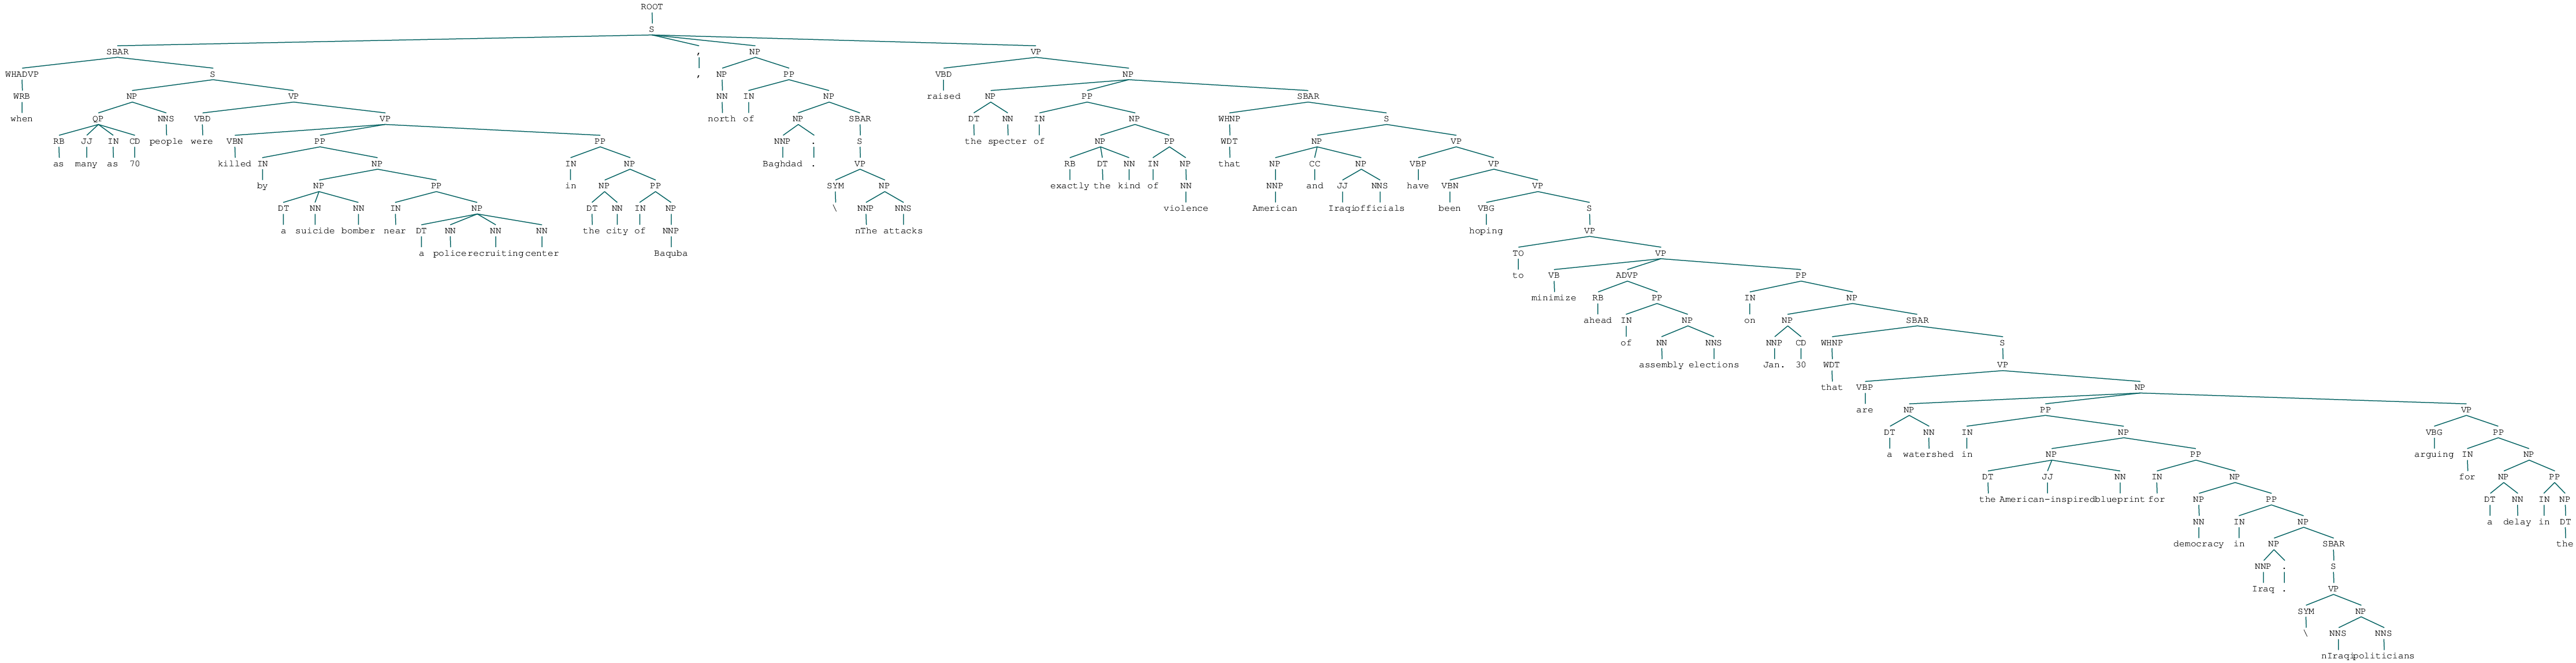

'Text =  when as many as 70 people were killed by a suicide bomber near a police recruiting center in the city of Baquba, north of Baghdad.\\nThe attacks raised the specter of exactly the kind of violence that American and Iraqi officials have been hoping to minimize ahead of assembly elections on Jan. 30 that are a watershed in the American-inspired blueprint for democracy in Iraq.\\nIraqi politicians arguing for a delay in the '

'Code = 1831'

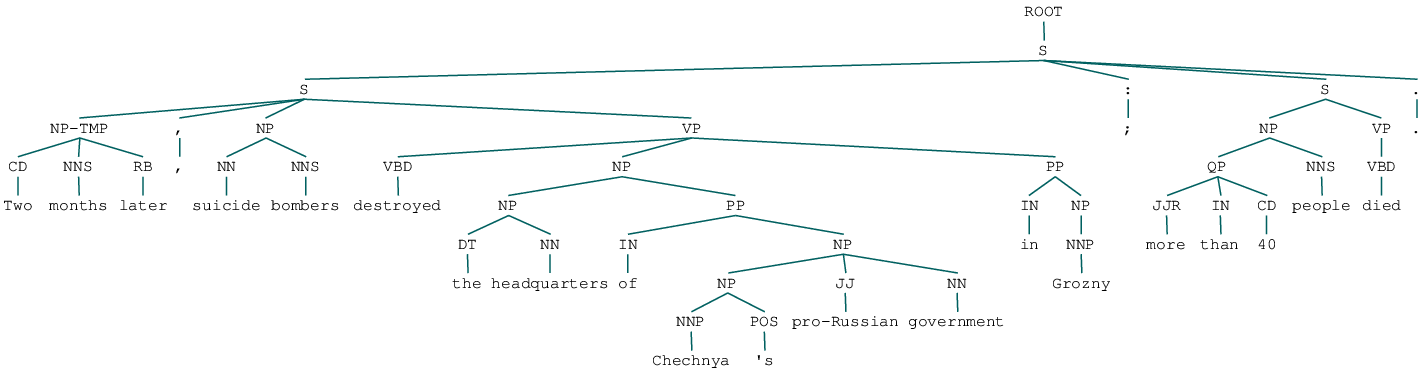

"Text = Two months later, suicide bombers destroyed the headquarters of Chechnya's pro-Russian government in Grozny; more than 40 people died."

'Code = 1831'

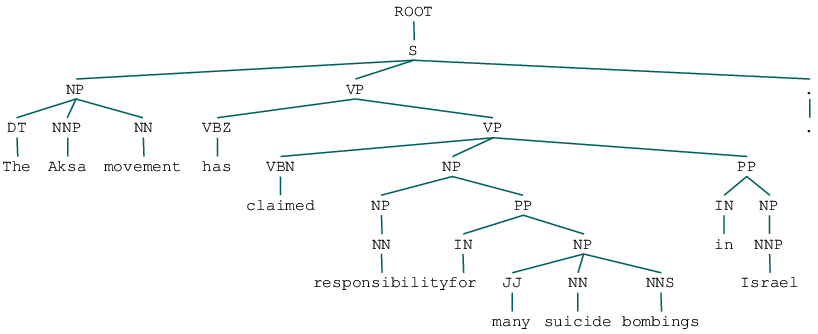

'Text = The Aksa movement has claimed responsibility for many suicide bombings in Israel.'

'Code = 1831'

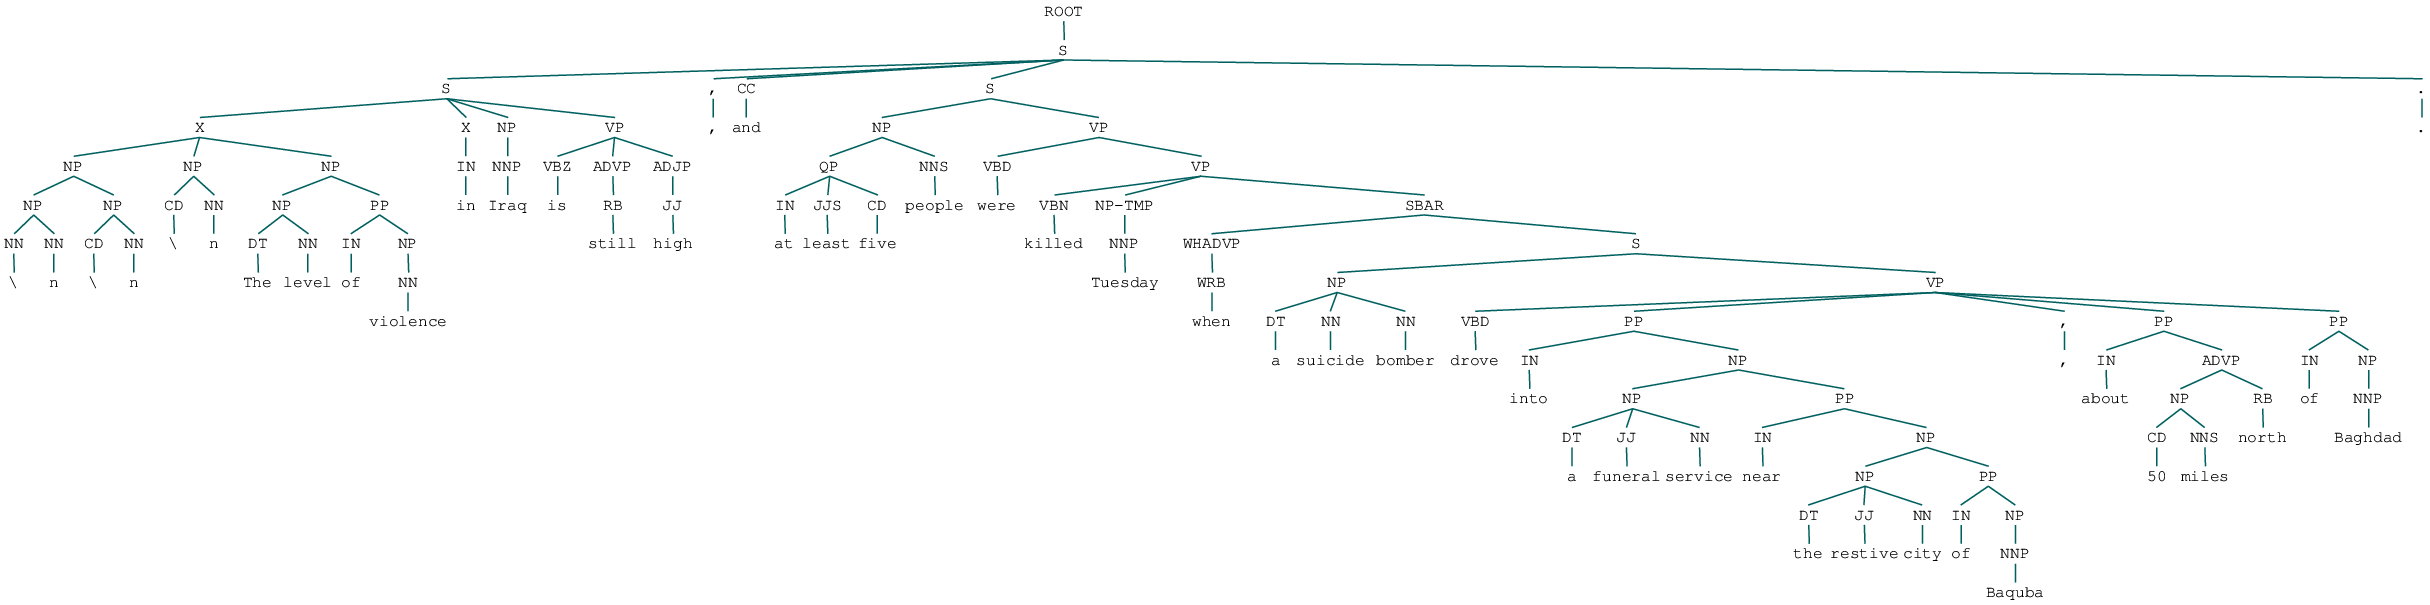

'Text = \\n\\n\\n The level of violence in Iraq is still high, and at least five people were killed Tuesday when a suicide bomber drove into a funeral service near the restive city of Baquba, about 50 miles north of Baghdad.'

'Code = 1831'

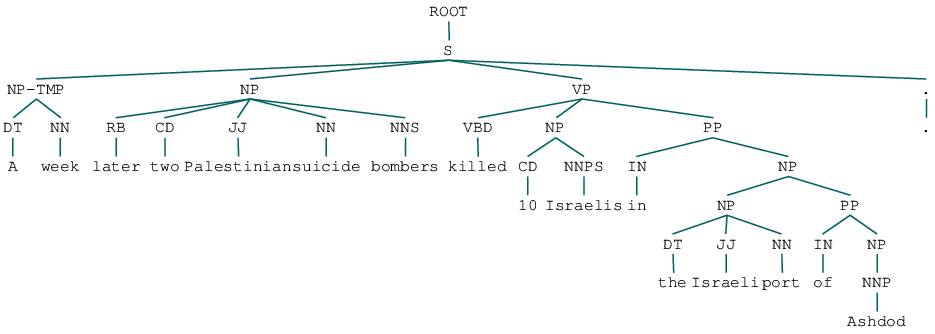

'Text = A week later two Palestinian suicide bombers killed 10 Israelis in the Israeli port of Ashdod.'

'Code = 1831'

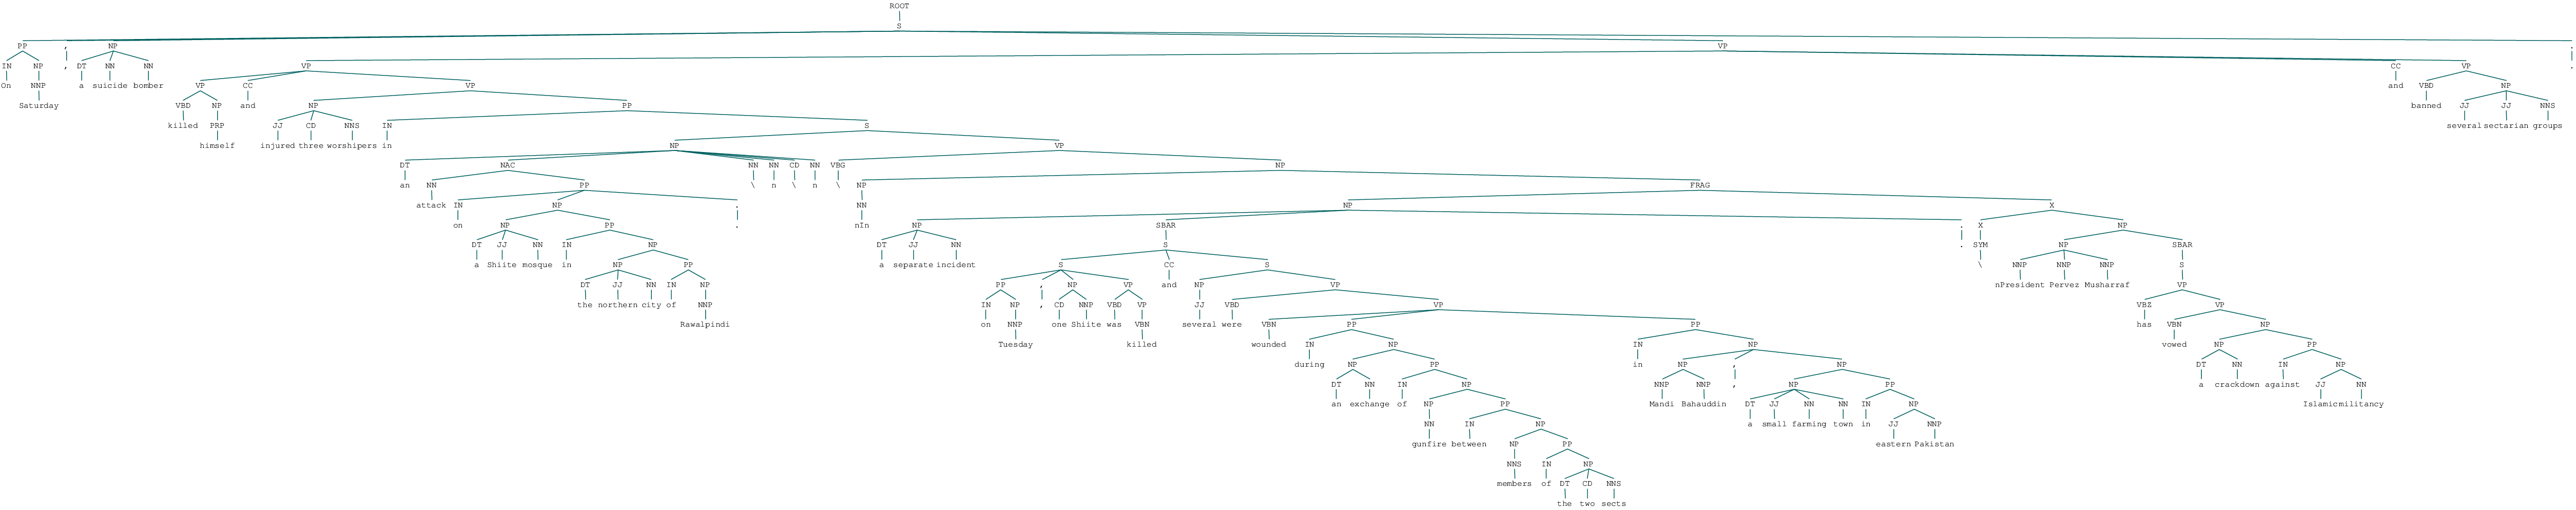

'Text = On Saturday, a suicide bomber killed himself and injured three worshipers in an attack on a Shiite mosque in the northern city of Rawalpindi.\\n\\n\\nIn a separate incident on Tuesday, one Shiite was killed and several were wounded during an exchange of gunfire between members of the two sects in Mandi Bahauddin, a small farming town in eastern Pakistan.\\nPresident Pervez Musharraf has vowed a crackdown against Islamic militancy and banned several sectarian groups.'

'Code = 1831'

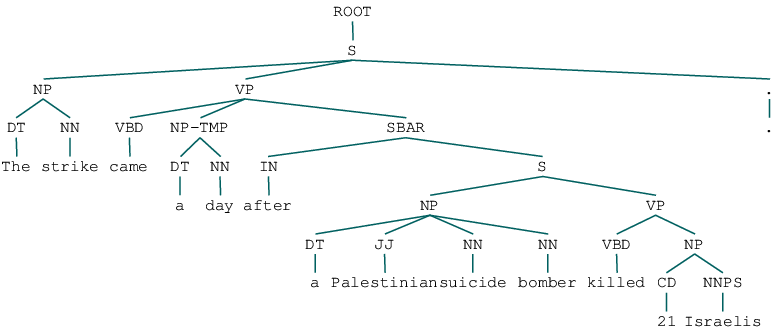

'Text = The strike came a day after a Palestinian suicide bomber killed 21 Israelis.'

'Code = 1831'

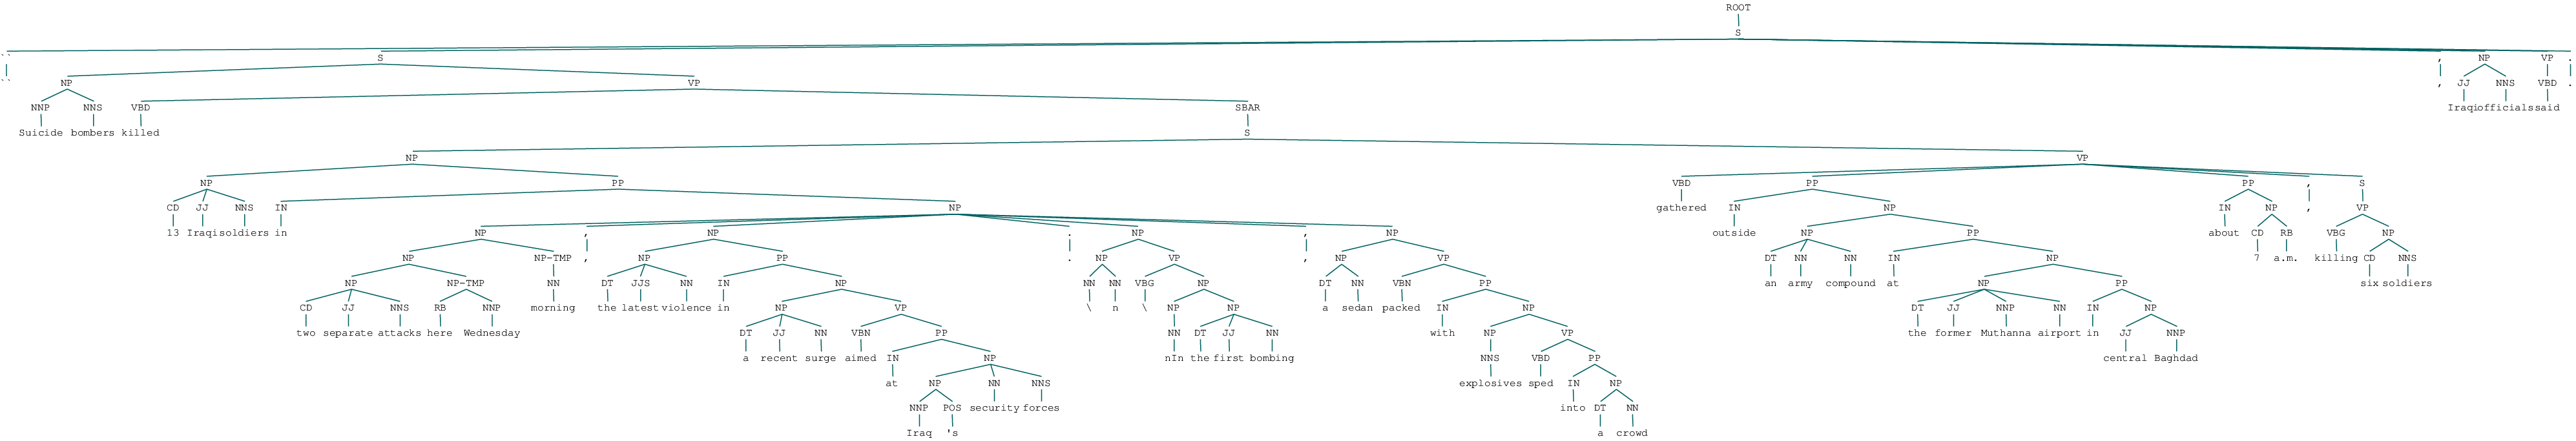

'Text = "Suicide bombers killed 13 Iraqi soldiers in two separate attacks here Wednesday morning, the latest violence in a recent surge aimed at Iraq\'s security forces.\\n\\nIn the first bombing, a sedan packed with explosives sped into a crowd gathered outside an army compound at the former Muthanna airport in central Baghdad about 7 a.m., killing six soldiers, Iraqi officials said.'

'Code = 1831'

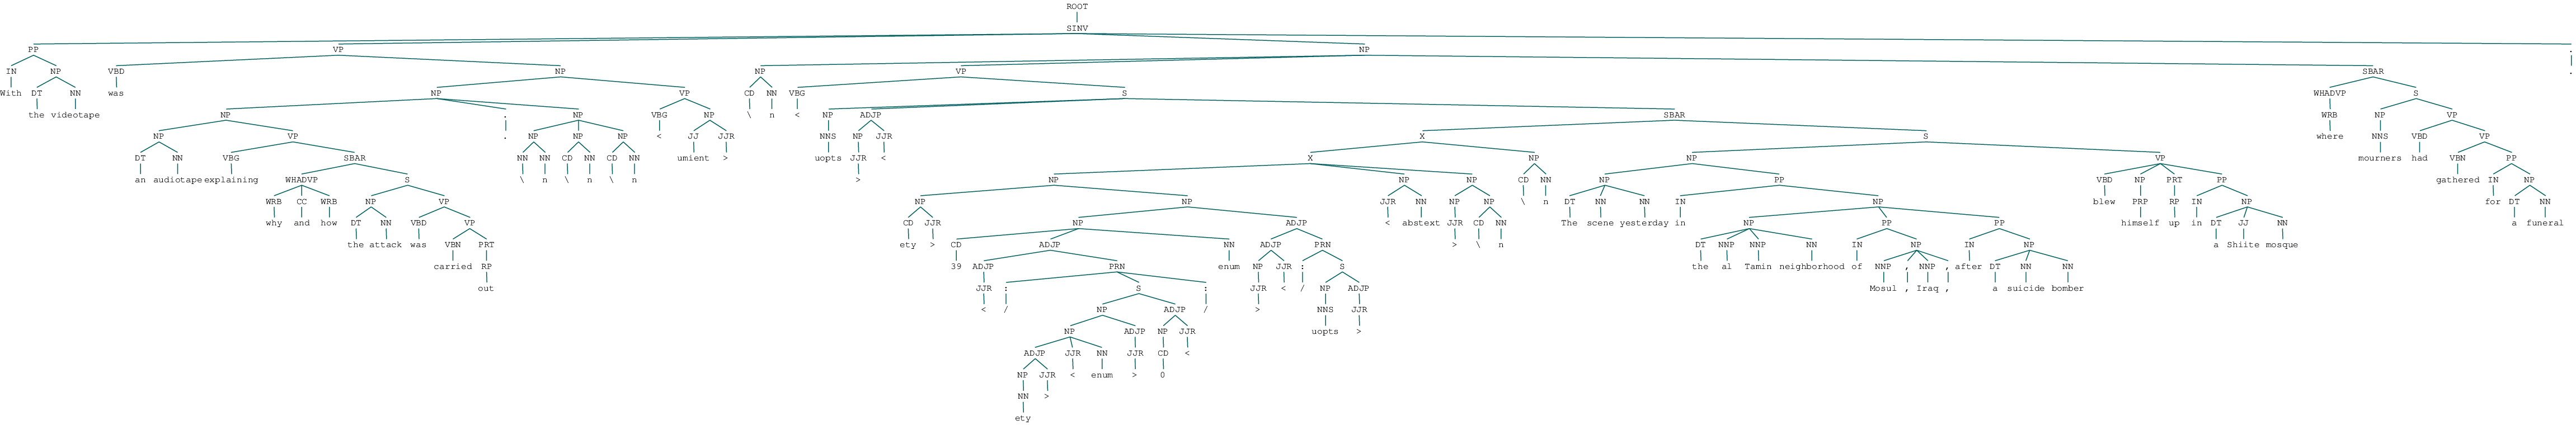

'Text = With the videotape was an audiotape explaining why and how the attack was carried out.\\n\\n\\n&lt;umient&gt;\\n&lt;uopts&gt;&lt;ety&gt;39&lt;/ety&gt;&lt;enum&gt;0&lt;/enum&gt;&lt;/uopts&gt;&lt;abstext&gt;\\n\\n The scene yesterday in the al Tamin neighborhood of Mosul, Iraq, after a suicide bomber blew himself up in a Shiite mosque where mourners had gathered for a funeral.'

'Code = 1831'

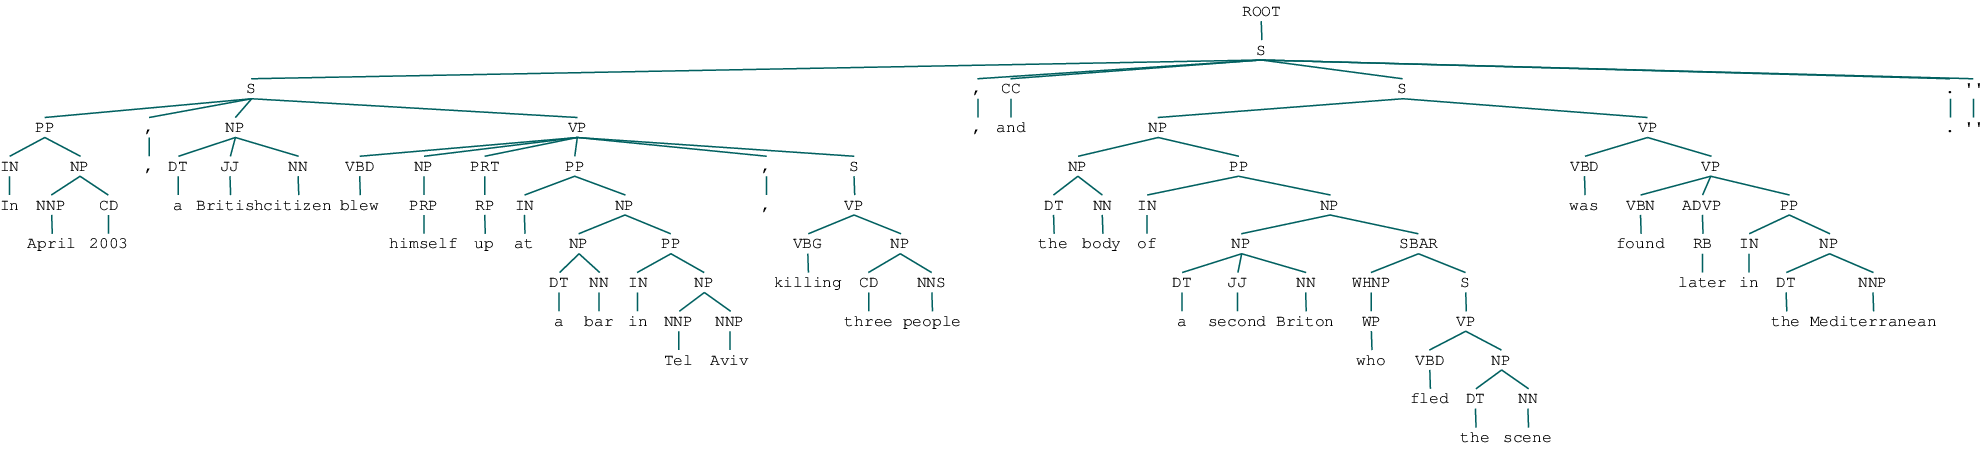

'Text = In April 2003, a British citizen blew himself up at a bar in Tel Aviv, killing three people, and the body of a second Briton who fled the scene was found later in the Mediterranean."'

'Code = 1831'

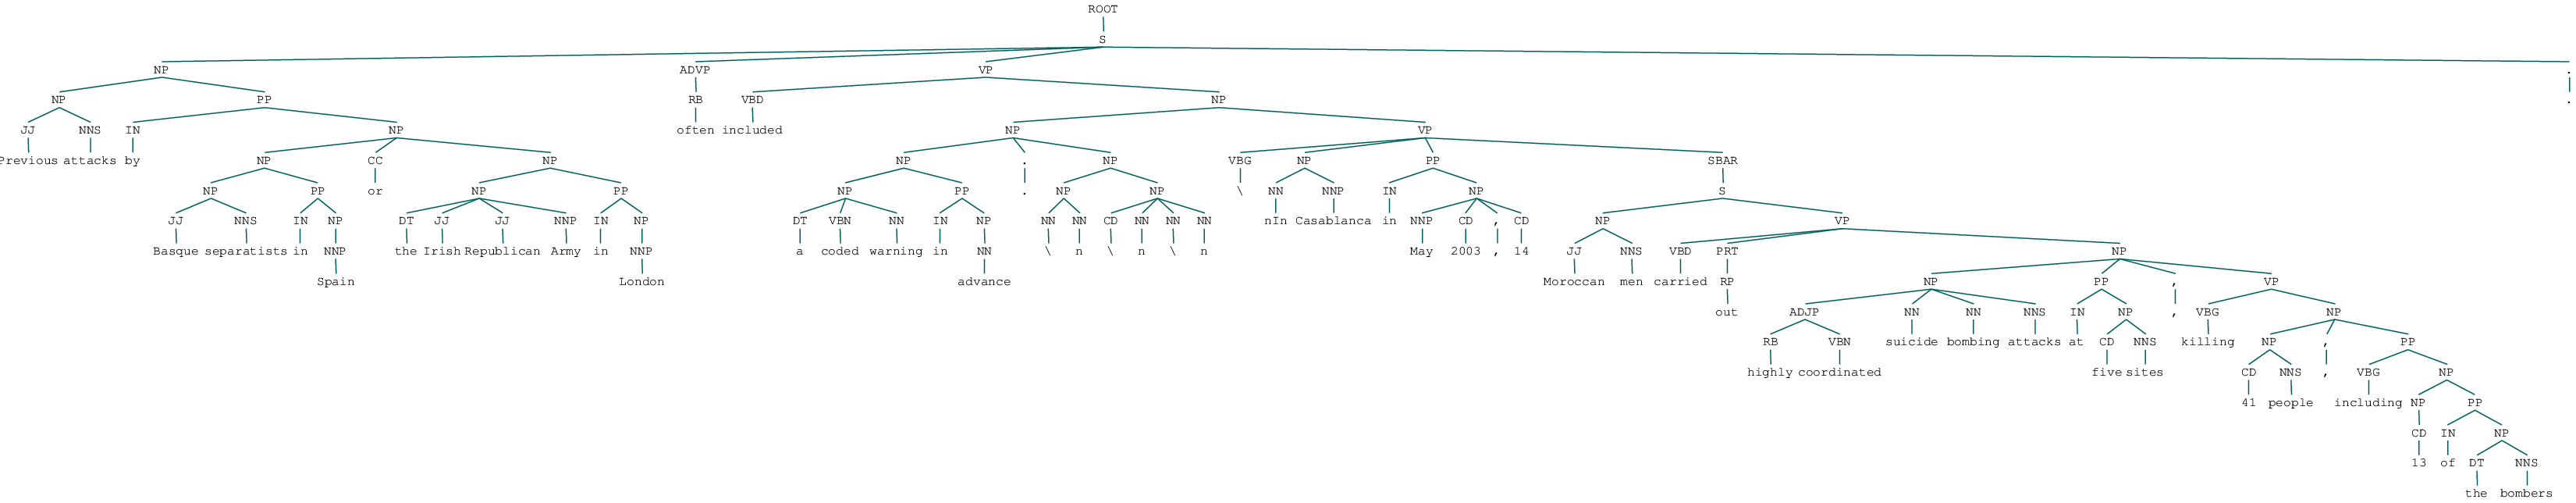

'Text = Previous attacks by Basque separatists in Spain or the Irish Republican Army in London often included a coded warning in advance.\\n\\n\\n\\nIn Casablanca in May 2003, 14 Moroccan men carried out highly coordinated suicide bombing attacks at five sites, killing 41 people, including 13 of the bombers.'

'Code = 1831'

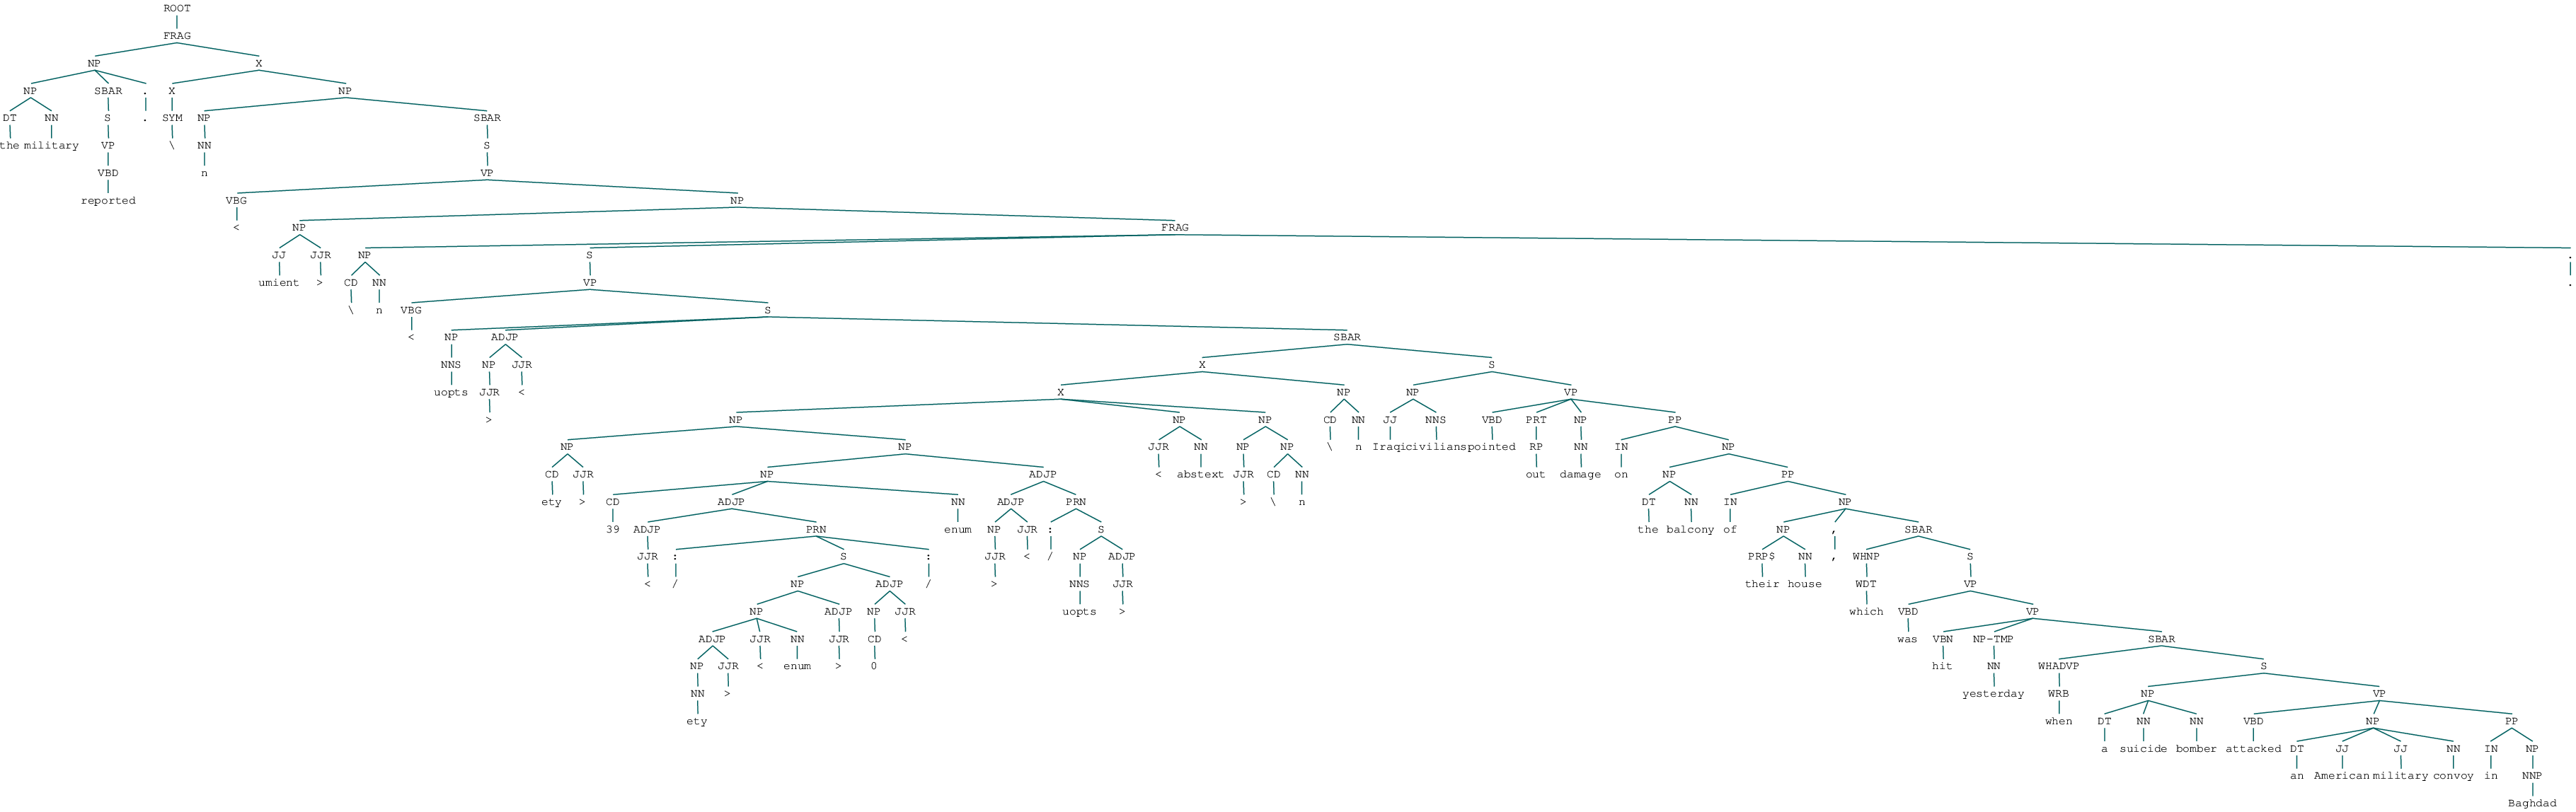

'Text =  the military reported.\\n&lt;umient&gt;\\n&lt;uopts&gt;&lt;ety&gt;39&lt;/ety&gt;&lt;enum&gt;0&lt;/enum&gt;&lt;/uopts&gt;&lt;abstext&gt;\\n\\n Iraqi civilians pointed out damage on the balcony of their house, which was hit yesterday when a suicide bomber attacked an American military convoy in Baghdad.'

'Code = 1831'

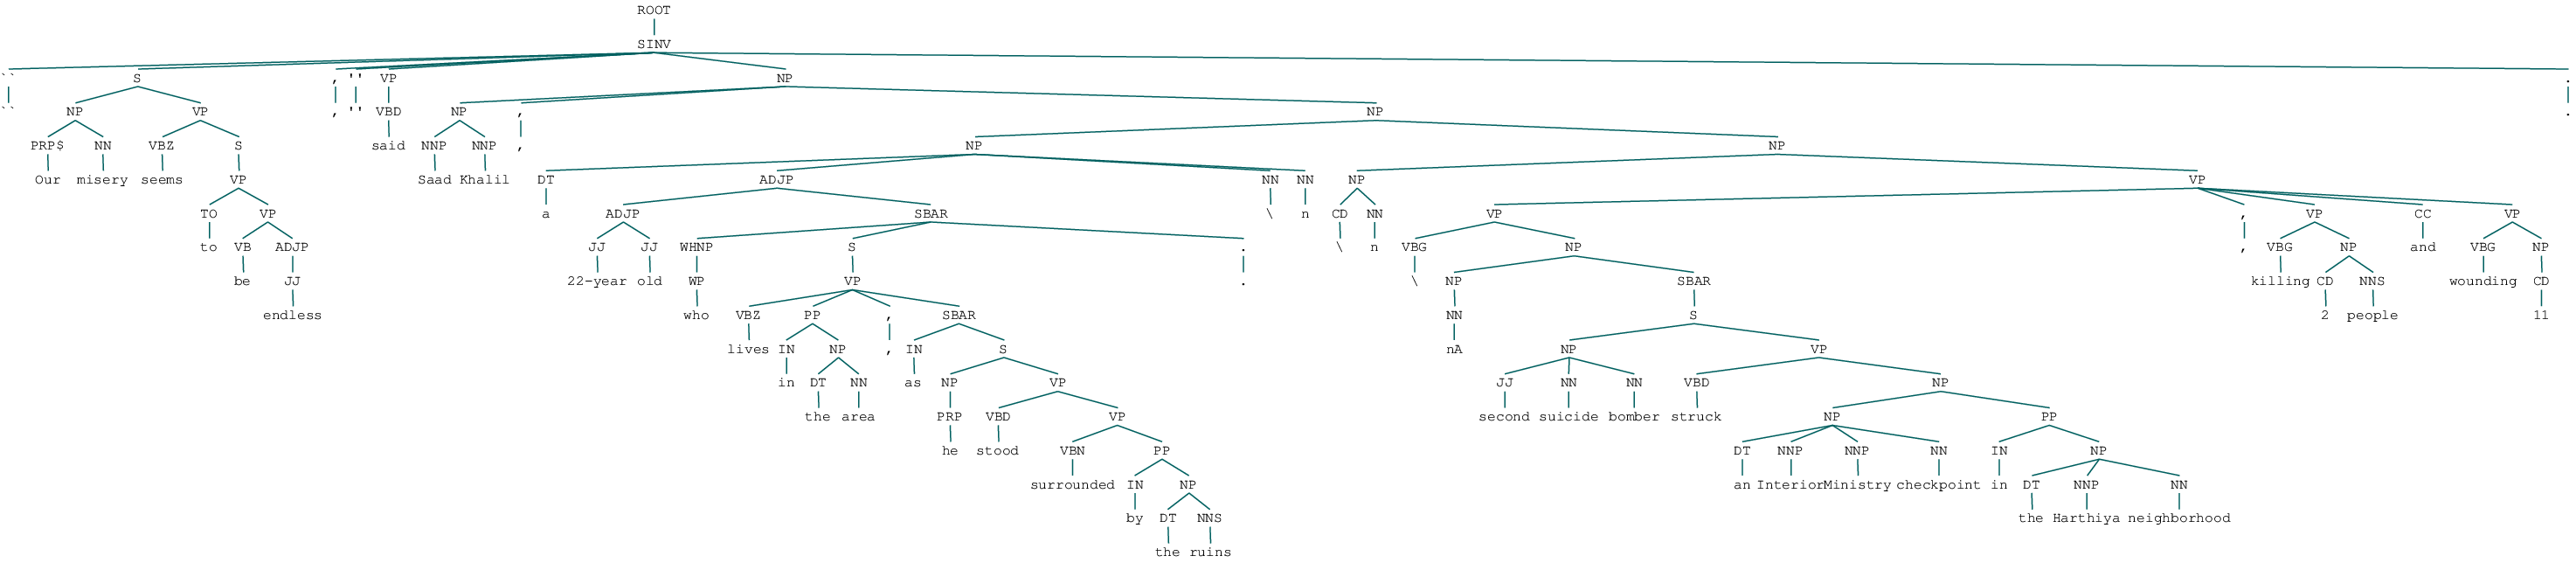

"Text = ''Our misery seems to be endless,'' said Saad Khalil, a 22-year old who lives in the area, as he stood surrounded by the ruins.\\n\\n\\nA second suicide bomber struck an Interior Ministry checkpoint in the Harthiya neighborhood, killing 2 people and wounding 11."

'Code = 1831'

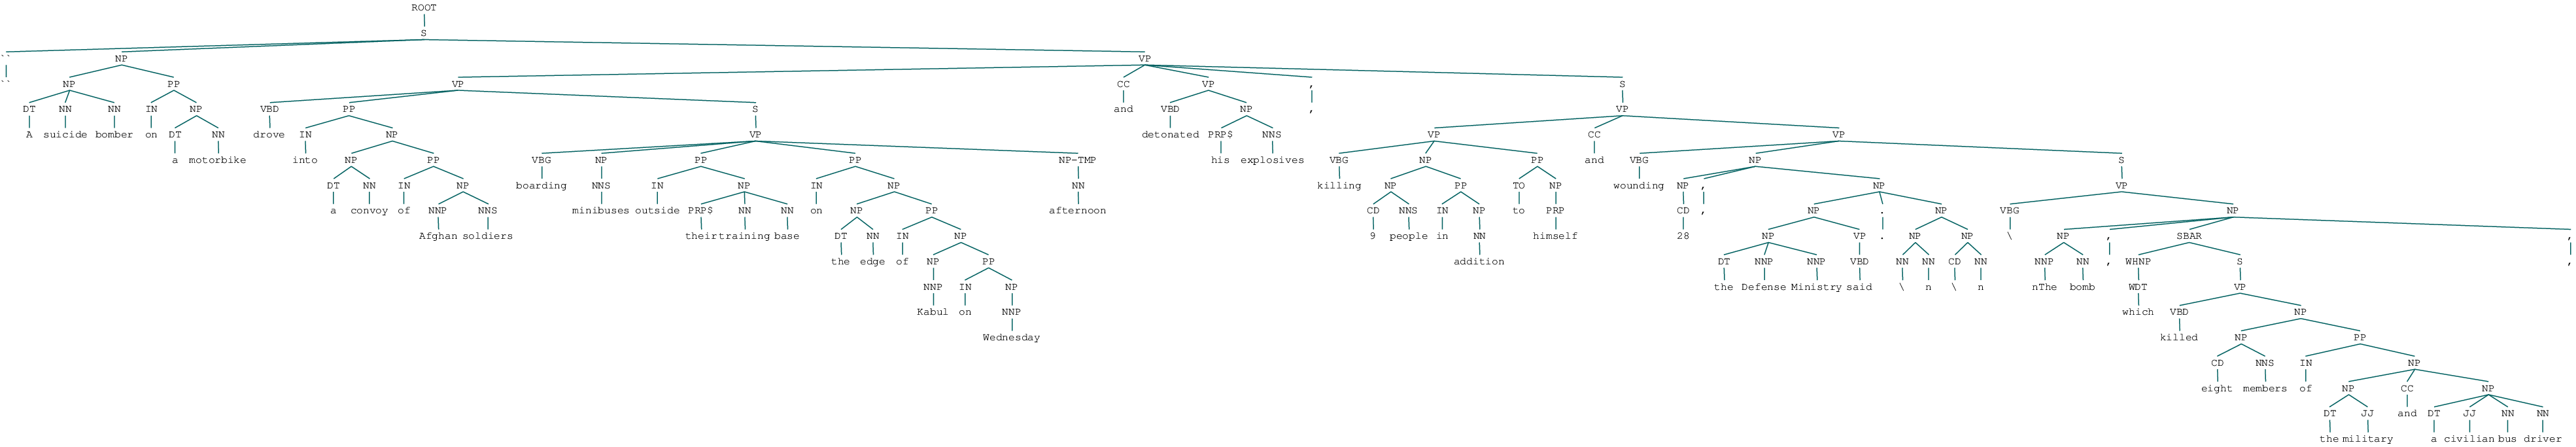

'Text = "A suicide bomber on a motorbike drove into a convoy of Afghan soldiers boarding minibuses outside their training base on the edge of Kabul on Wednesday afternoon and detonated his explosives, killing 9 people in addition to himself and wounding 28, the Defense Ministry said.\\n\\n\\nThe bomb, which killed eight members of the military and a civilian bus driver,'

'Code = 1831'

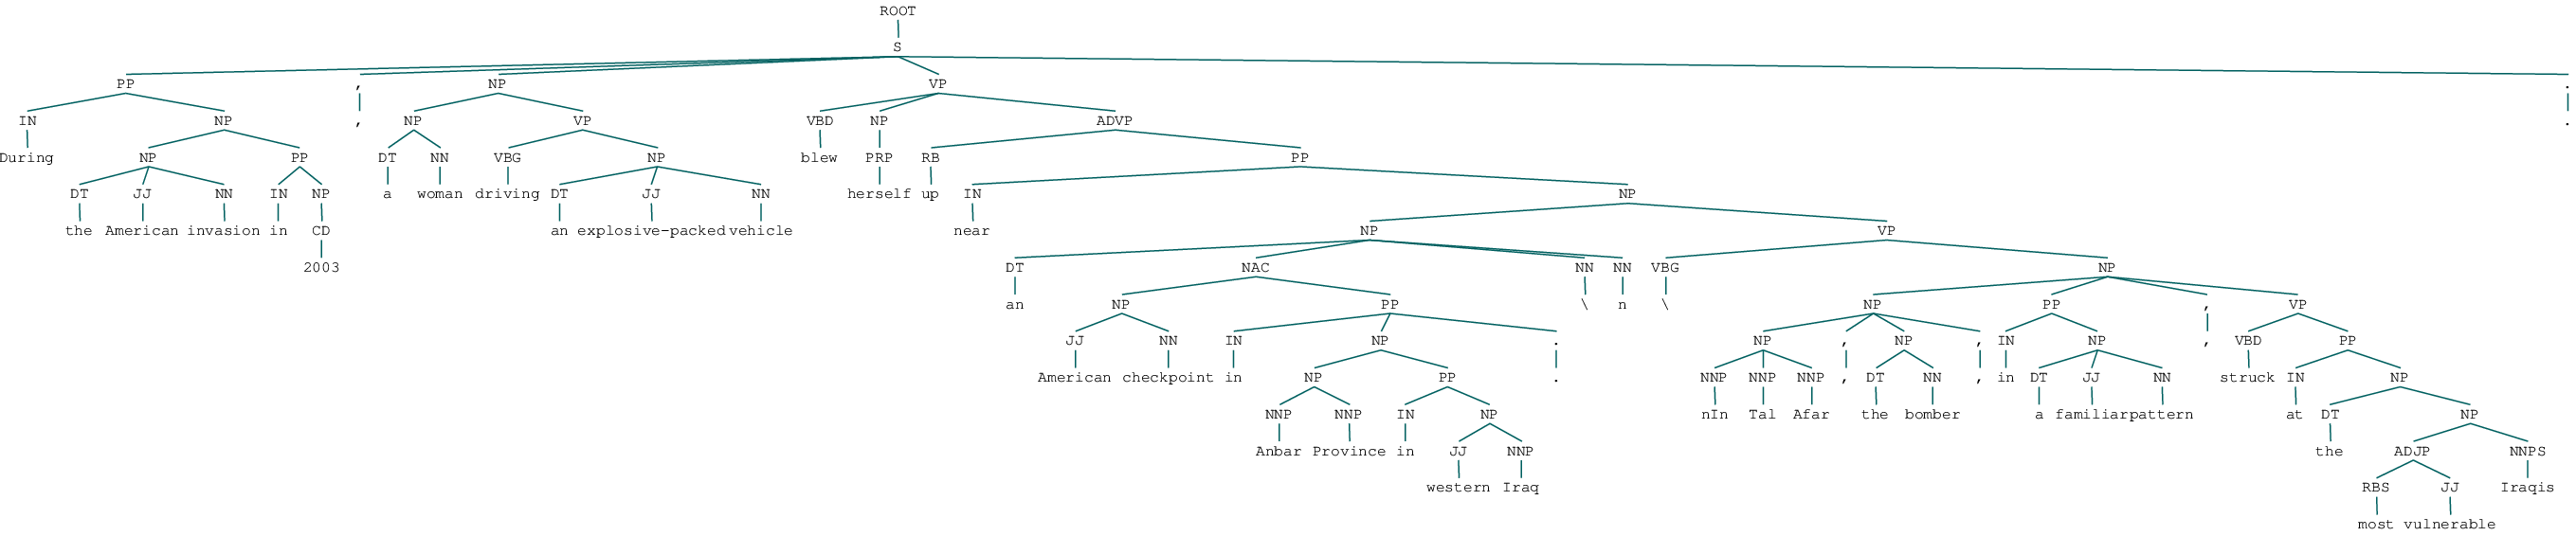

'Text = During the American invasion in 2003, a woman driving an explosive-packed vehicle blew herself up near an American checkpoint in Anbar Province in western Iraq.\\n\\nIn Tal Afar, the bomber, in a familiar pattern, struck at the most vulnerable Iraqis.'

'Code = 1831'

In [125]:
for i in range(len(accent2_1831_only)):
    parsed_output(accent2_1831_only, i)

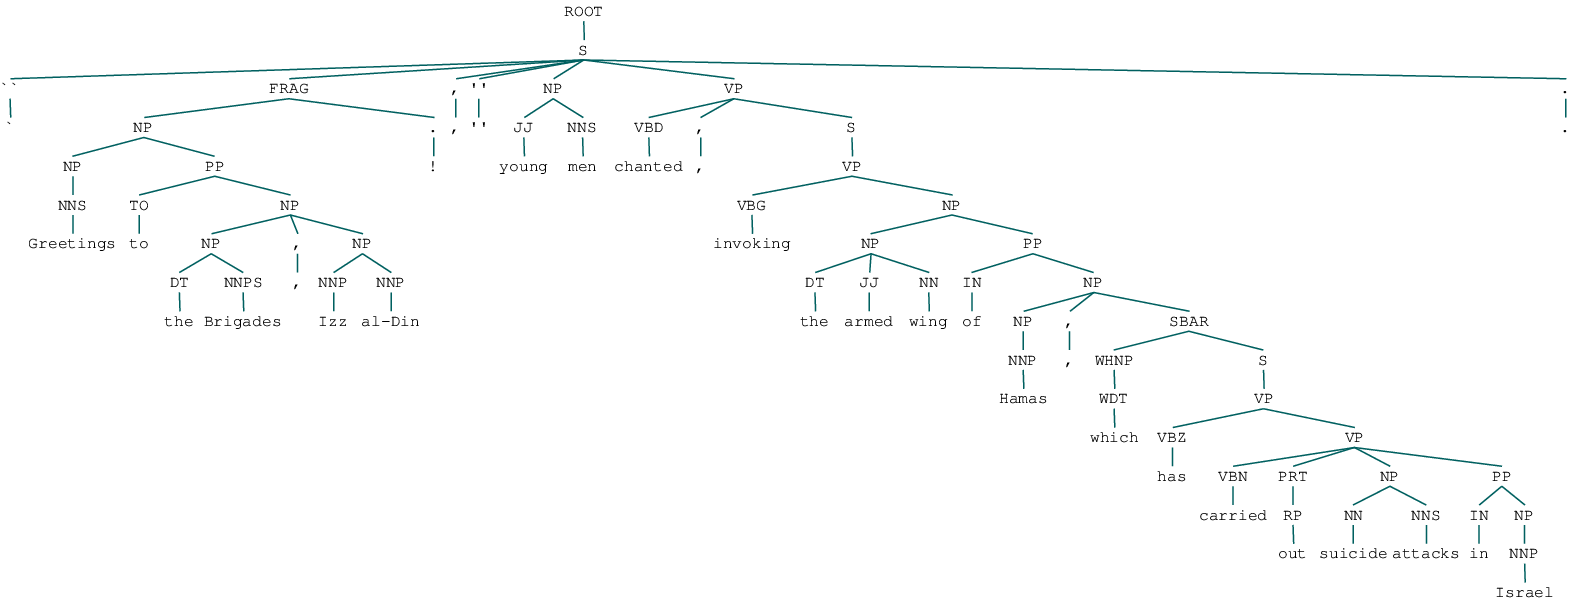

In [126]:
one_sentence_parser("'Greetings to the Brigades, Izz al-Din!,'' young men chanted, invoking the armed wing of Hamas, which has carried out suicide attacks in Israel.")